# U-Net Semantic Segmentation Training Dataset
### QCar2 Autonomous Driving - Lane Segmentation

Este notebook demuestra:
- Carga del dataset preparado
- Visualización de máscaras de segmentación
- Overlay de segmentación sobre imágenes originales

## 1. Setup e Imports

In [1]:
!ls
!cd qcar2_LaneSeg-ACC/train_unet
!ls

best_model.pth		       qcar2_autonomy
isaac_ros_common	       qcar2_interfaces
isaac_ros_dnn_inference        qcar2_lane_following
isaac_ros_image_pipeline       qcar2_LaneSeg-ACC
isaac_ros_image_segmentation   qcar2_nodes
isaac_ros_nitros	       teleop_twist_keyboard
lane_unet.onnx		       training_curves.png
predictions_visualization.png
best_model.pth		       qcar2_autonomy
isaac_ros_common	       qcar2_interfaces
isaac_ros_dnn_inference        qcar2_lane_following
isaac_ros_image_pipeline       qcar2_LaneSeg-ACC
isaac_ros_image_segmentation   qcar2_nodes
isaac_ros_nitros	       teleop_twist_keyboard
lane_unet.onnx		       training_curves.png
predictions_visualization.png


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import random
import sys
import os
dir=sys.path.append("qcar2_LaneSeg-ACC/train_unet")
!ls
# Import local modules
import config
from prepare_dataset import visualize_mask, overlay_mask_on_image

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

print("✅ Imports successful!")
print(f"Number of classes: {config.NUM_CLASSES}")

best_model.pth		       qcar2_autonomy
isaac_ros_common	       qcar2_interfaces
isaac_ros_dnn_inference        qcar2_lane_following
isaac_ros_image_pipeline       qcar2_LaneSeg-ACC
isaac_ros_image_segmentation   qcar2_nodes
isaac_ros_nitros	       teleop_twist_keyboard
lane_unet.onnx		       training_curves.png
predictions_visualization.png
✅ Imports successful!
Number of classes: 4


## 2. Class Configuration

In [3]:
# Display class mapping
print("Semantic Segmentation Classes:\n")
for class_id in range(config.NUM_CLASSES):
    class_name = config.get_class_name(class_id)
    color_rgb = config.get_class_color(class_id, bgr=False)
    print(f"  Clase {class_id}: {class_name}")
    print(f"    RGB: {color_rgb}\n")

Semantic Segmentation Classes:

  Clase 0: Fondo / Vereda / Obstáculos
    RGB: (0, 0, 0)

  Clase 1: Camino / Asfalto transitable
    RGB: (0, 0, 255)

  Clase 2: Líneas de tráfico
    RGB: (255, 255, 0)

  Clase 3: Bordes de camino
    RGB: (255, 0, 0)



## 3. Color Legend Visualization

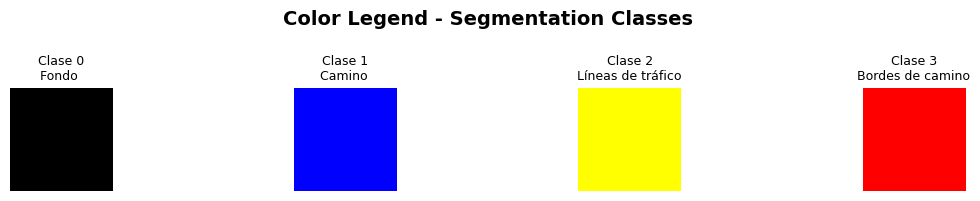

In [4]:
# Create color legend
fig, axes = plt.subplots(1, config.NUM_CLASSES, figsize=(12, 2))

for class_id in range(config.NUM_CLASSES):
    color_rgb = config.get_class_color(class_id, bgr=False)
    class_name = config.get_class_name(class_id)
    
    # Create solid color patch
    color_patch = np.ones((50, 50, 3), dtype=np.uint8)
    color_patch[:, :] = color_rgb
    
    # Display
    axes[class_id].imshow(color_patch)
    axes[class_id].set_title(f"Clase {class_id}\n{class_name.split('/')[0]}", fontsize=9)
    axes[class_id].axis('off')

plt.suptitle('Color Legend - Segmentation Classes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Load Dataset

In [5]:
# Dataset paths
print(dir)
!ls
dataset_base = Path("qcar2_LaneSeg-ACC/train_unet/training_data/dataset_images")

train_images_path = dataset_base / 'train' / 'images'
train_masks_path = dataset_base / 'train' / 'masks'

# Get list of files
if train_images_path.exists():
    image_files = sorted(list(train_images_path.glob('*.png')))
    mask_files = sorted(list(train_masks_path.glob('*.png')))
    
    print(f"📁 Found {len(image_files)} training images")
    print(f"📁 Found {len(mask_files)} training masks")
    
    if len(image_files) != len(mask_files):
        print("⚠️  Warning: Number of images and masks do not match!")
else:
    print("❌ Dataset not found! Run prepare_dataset.py first.")
    image_files = []
    mask_files = []

None
best_model.pth		       qcar2_autonomy
isaac_ros_common	       qcar2_interfaces
isaac_ros_dnn_inference        qcar2_lane_following
isaac_ros_image_pipeline       qcar2_LaneSeg-ACC
isaac_ros_image_segmentation   qcar2_nodes
isaac_ros_nitros	       teleop_twist_keyboard
lane_unet.onnx		       training_curves.png
predictions_visualization.png
📁 Found 24 training images
📁 Found 24 training masks


## 5. Visualize Random Sample

Sample 21: img_00021.png
Image shape: (480, 640, 3)
Mask shape: (480, 640)
Classes present: [0 1 2 3]


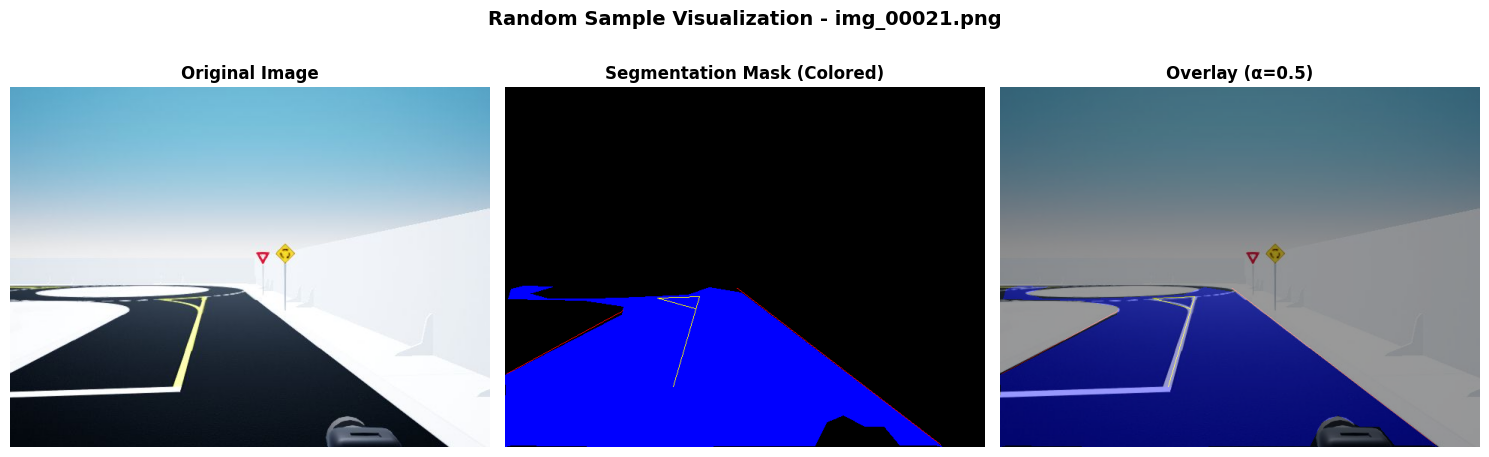

In [6]:
if image_files:
    # Select random sample
    idx = random.randint(0, len(image_files) - 1)
    
    # Load image and mask
    image = cv2.imread(str(image_files[idx]))
    mask = cv2.imread(str(mask_files[idx]), cv2.IMREAD_GRAYSCALE)
    
    # Check unique classes in this mask
    unique_classes = np.unique(mask)
    print(f"Sample {idx + 1}: {image_files[idx].name}")
    print(f"Image shape: {image.shape}")
    print(f"Mask shape: {mask.shape}")
    print(f"Classes present: {unique_classes}")
    
    # Create visualizations
    colored_mask = visualize_mask(mask, use_colors=True)
    overlay = overlay_mask_on_image(image, mask, alpha=0.4)
    
    # Plot
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original image
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image', fontsize=12, fontweight='bold')
    axes[0].axis('off')
    
    # Colored mask
    axes[1].imshow(cv2.cvtColor(colored_mask, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Segmentation Mask (Colored)', fontsize=12, fontweight='bold')
    axes[1].axis('off')
    
    # Overlay
    axes[2].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Overlay (α=0.5)', fontsize=12, fontweight='bold')
    axes[2].axis('off')
    
    plt.suptitle(f'Random Sample Visualization - {image_files[idx].name}', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("❌ No images to display")

## 6. Class Distribution Analysis

Analyzing class distribution...


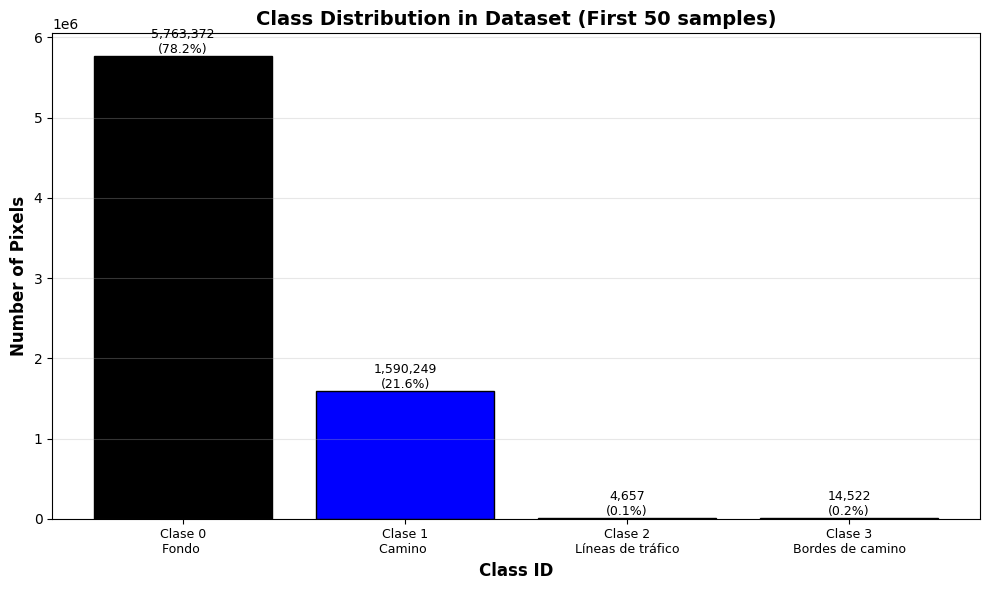


Class Distribution Summary:
  Clase 0: 5,763,372 pixels (78.17%)
  Clase 1: 1,590,249 pixels (21.57%)
  Clase 2: 4,657 pixels (0.06%)
  Clase 3: 14,522 pixels (0.20%)


In [7]:
if mask_files:
    # Count pixels per class across all masks
    class_counts = np.zeros(config.NUM_CLASSES, dtype=np.int64)
    
    print("Analyzing class distribution...")
    for mask_file in mask_files[:50]:  # Analyze first 50 for speed
        mask = cv2.imread(str(mask_file), cv2.IMREAD_GRAYSCALE)
        for class_id in range(config.NUM_CLASSES):
            class_counts[class_id] += np.sum(mask == class_id)
    
    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    
    colors = []
    labels = []
    for class_id in range(config.NUM_CLASSES):
        color_rgb = np.array(config.get_class_color(class_id, bgr=False)) / 255.0
        colors.append(color_rgb)
        labels.append(f"Clase {class_id}\n{config.get_class_name(class_id).split('/')[0]}")
    
    bars = ax.bar(range(config.NUM_CLASSES), class_counts, color=colors, edgecolor='black')
    ax.set_xlabel('Class ID', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Pixels', fontsize=12, fontweight='bold')
    ax.set_title('Class Distribution in Dataset (First 50 samples)', fontsize=14, fontweight='bold')
    ax.set_xticks(range(config.NUM_CLASSES))
    ax.set_xticklabels(labels, fontsize=9)
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, (bar, count) in enumerate(zip(bars, class_counts)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{count:,}\n({count/class_counts.sum()*100:.1f}%)',
                ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    print("\nClass Distribution Summary:")
    for class_id in range(config.NUM_CLASSES):
        percentage = class_counts[class_id] / class_counts.sum() * 100
        print(f"  Clase {class_id}: {class_counts[class_id]:,} pixels ({percentage:.2f}%)")
else:
    print("❌ No masks to analyze")

## 7. Multiple Random Samples Grid

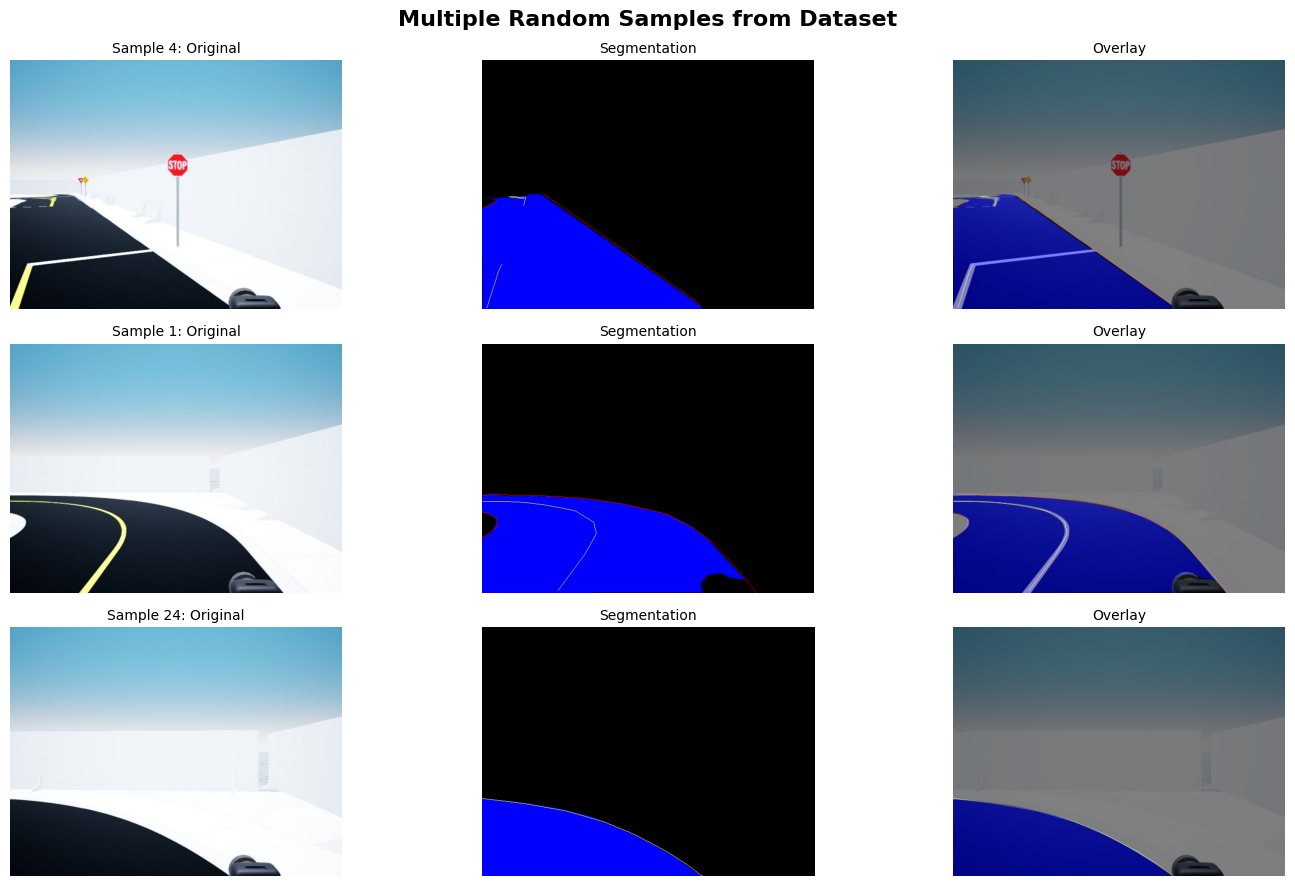

In [8]:
if image_files and len(image_files) >= 2:
    # Select 6 random samples
    num_samples = 3
    random_indices = random.sample(range(len(image_files)), num_samples)
    
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, num_samples * 3))
    
    for i, idx in enumerate(random_indices):
        # Load data
        image = cv2.imread(str(image_files[idx]))
        mask = cv2.imread(str(mask_files[idx]), cv2.IMREAD_GRAYSCALE)
        
        # Create visualizations
        colored_mask = visualize_mask(mask, use_colors=True)
        overlay = overlay_mask_on_image(image, mask, alpha=0.5)
        
        # Plot row
        axes[i, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i, 0].set_title(f'Sample {idx + 1}: Original', fontsize=10)
        axes[i, 0].axis('off')
        
        axes[i, 1].imshow(cv2.cvtColor(colored_mask, cv2.COLOR_BGR2RGB))
        axes[i, 1].set_title('Segmentation', fontsize=10)
        axes[i, 1].axis('off')
        
        axes[i, 2].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
        axes[i, 2].set_title('Overlay', fontsize=10)
        axes[i, 2].axis('off')
    
    plt.suptitle('Multiple Random Samples from Dataset', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("❌ Not enough images for grid visualization")

## 8. Dataset Summary

In [9]:
print("="*60)
print("DATASET SUMMARY")
print("="*60)

if image_files:
    sample_image = cv2.imread(str(image_files[0]))
    height, width = sample_image.shape[:2]
    
    print(f"\n📊 Dataset Statistics:")
    print(f"  Training samples: {len(image_files)}")
    print(f"  Image dimensions: {width}x{height}")
    print(f"  Number of classes: {config.NUM_CLASSES}")
    print(f"\n🎨 Color Mapping:")
    for class_id in range(config.NUM_CLASSES):
        name = config.get_class_name(class_id)
        color = config.get_class_color(class_id, bgr=False)
        print(f"  Clase {class_id}: {name} → RGB{color}")
    print(f"\n💡 Tip: Use these functions for visualization:")
    print(f"  - visualize_mask(mask, use_colors=True)")
    print(f"  - overlay_mask_on_image(image, mask, alpha=0.5)")
else:
    print("\n❌ No dataset found. Run prepare_dataset.py first.")

print("\n" + "="*60)

DATASET SUMMARY

📊 Dataset Statistics:
  Training samples: 24
  Image dimensions: 640x480
  Number of classes: 4

🎨 Color Mapping:
  Clase 0: Fondo / Vereda / Obstáculos → RGB(0, 0, 0)
  Clase 1: Camino / Asfalto transitable → RGB(0, 0, 255)
  Clase 2: Líneas de tráfico → RGB(255, 255, 0)
  Clase 3: Bordes de camino → RGB(255, 0, 0)

💡 Tip: Use these functions for visualization:
  - visualize_mask(mask, use_colors=True)
  - overlay_mask_on_image(image, mask, alpha=0.5)



## TRAIN_UNET

In [10]:
# ============================================================================
# CELDA 1: IMPORTS
# Copiar/pegar esta celda al inicio del notebook después de las celdas existentes
# ============================================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random
from tqdm import tqdm
import sys
import os

# Agregar path al módulo local
sys.path.append('.')

# Importar módulos locales
import config
from prepare_dataset import visualize_mask, overlay_mask_on_image

# Configurar semillas para reproducibilidad
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

print("✅ Imports exitosos!")


✅ Imports exitosos!


In [11]:
# ============================================================================
# CELDA 2: HIPERPARÁMETROS
# ============================================================================

# Hiperparámetros de entrenamiento
BATCH_SIZE = 3
LEARNING_RATE = 100e-2
NUM_EPOCHS = 250  # Ajustable entre 20-50

# Dimensiones de imagen (CRÍTICO para Isaac ROS)
IMAGE_HEIGHT = 480
IMAGE_WIDTH = 640

# Número de clases de segmentación  
NUM_CLASSES = 4

# Dispositivo (GPU si está disponible)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Rutas de datos
DATASET_BASE = Path("qcar2_LaneSeg-ACC/train_unet/training_data/dataset_images")
TRAIN_IMAGES_PATH = DATASET_BASE / 'train' / 'images'
TRAIN_MASKS_PATH = DATASET_BASE / 'train' / 'masks'
VAL_IMAGES_PATH = DATASET_BASE / 'val' / 'images'
VAL_MASKS_PATH = DATASET_BASE / 'val' / 'masks'

# Pesos de clase para CrossEntropyLoss
# [fondo, camino, líneas, bordes]
CLASS_WEIGHTS = torch.tensor([0.1, 1.0, 10.0, 1.0]).to(DEVICE)

print(f"✅ Configuración:")
print(f"   - Device: {DEVICE}")
print(f"   - Batch size: {BATCH_SIZE}")
print(f"   - Learning rate: {LEARNING_RATE}")
print(f"   - Épocas: {NUM_EPOCHS}")
print(f"   - Resolución: {IMAGE_WIDTH}x{IMAGE_HEIGHT}")
print(f"   - Clases: {NUM_CLASSES}")


✅ Configuración:
   - Device: cuda
   - Batch size: 3
   - Learning rate: 1.0
   - Épocas: 250
   - Resolución: 640x480
   - Clases: 4


In [12]:
# ============================================================================
# CELDA 3: DATASET Y DATALOADERS
# ============================================================================

class SegmentationDataset(Dataset):
    """
    Dataset personalizado para segmentación semántica de carriles.
    
    Args:
        images_dir: Directorio con imágenes RGB
        masks_dir: Directorio con máscaras de segmentación
        transform: Transformaciones a aplicar (opcional)
    """
    
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = Path(images_dir)
        self.masks_dir = Path(masks_dir)
        self.transform = transform
        
        # Listar archivos de imágenes
        self.image_files = sorted(list(self.images_dir.glob('*.png')))
        self.mask_files = sorted(list(self.masks_dir.glob('*.png')))
        
        # Verificar que coincidan
        assert len(self.image_files) == len(self.mask_files), \
            f"Número de imágenes ({len(self.image_files)}) != número de máscaras ({len(self.mask_files)})"
        
        print(f"✅ Dataset inicializado: {len(self.image_files)} muestras")
    
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        # Cargar imagen (RGB)
        image_path = self.image_files[idx]
        image = cv2.imread(str(image_path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR -> RGB
        
        # Cargar máscara (escala de grises)
        mask_path = self.mask_files[idx]
        mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)
        
        # Aplicar transformaciones
        if self.transform:
            # Resize obligatorio a 640x480 (Isaac ROS)
            image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT), 
                             interpolation=cv2.INTER_LINEAR)
            mask = cv2.resize(mask, (IMAGE_WIDTH, IMAGE_HEIGHT), 
                            interpolation=cv2.INTER_NEAREST)
        
        # Normalizar imagen a [0, 1]
        image = image.astype(np.float32) / 255.0
        
        # Convertir a tensores
        image = torch.from_numpy(image).permute(2, 0, 1)  # HWC -> CHW
        mask = torch.from_numpy(mask).long()  # Importante: usar long/int64
        
        return image, mask


# Crear datasets
print("\n📂 Creando datasets...")
train_dataset = SegmentationDataset(TRAIN_IMAGES_PATH, TRAIN_MASKS_PATH, transform=True)
val_dataset = SegmentationDataset(VAL_IMAGES_PATH, VAL_MASKS_PATH, transform=True)

# Crear dataloaders
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

print(f"✅ DataLoaders creados:")
print(f"   - Train batches: {len(train_loader)}")
print(f"   - Val batches: {len(val_loader)}")



📂 Creando datasets...
✅ Dataset inicializado: 24 muestras
✅ Dataset inicializado: 7 muestras
✅ DataLoaders creados:
   - Train batches: 8
   - Val batches: 3


In [13]:
# ============================================================================
# CELDA 4: MODELO OPTIMIZED U-NET
# ============================================================================

class DoubleConv(nn.Module):
    """Bloque de doble convolución: (Conv -> BatchNorm -> ReLU) x 2"""
    
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
    
    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """Bloque de downsampling: MaxPool -> DoubleConv"""
    
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )
    
    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """Bloque de upsampling: ConvTranspose -> Concat -> DoubleConv"""
    
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
        self.conv = DoubleConv(in_channels, out_channels)
    
    def forward(self, x1, x2):
        x1 = self.up(x1)
        
        # Asegurar dimensiones compatibles para concatenación
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]
        
        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                       diffY // 2, diffY - diffY // 2])
        
        # Concatenar con skip connection
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OptimizedUNet(nn.Module):
    """
    Arquitectura U-Net optimizada para segmentación semántica de carriles.
    
    Args:
        in_channels: Número de canales de entrada (3 para RGB)
        num_classes: Número de clases de segmentación (4: fondo, camino, líneas, bordes)
    """
    
    def __init__(self, in_channels=3, num_classes=4):
        super().__init__()
        
        # Encoder (contracting path)
        self.inc = DoubleConv(in_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        
        # Bottleneck (Cuello de botella)
        self.down4 = Down(512, 512)
        
        # Decoder (expansive path) - AJUSTADO CON PARCHES DE CANALES
        
        # up1: Recibe 512. Upsample a 256. Concatena con down3 (512). Total entrada = 768
        self.up1 = Up(512, 256)
        self.up1.conv = DoubleConv(768, 256) # Parche manual
        
        # up2: Recibe 256. Upsample a 128. Concatena con down2 (256). Total entrada = 384
        self.up2 = Up(256, 128)
        self.up2.conv = DoubleConv(384, 128) # Parche manual

        # up3: Recibe 128. Upsample a 64. Concatena con down1 (128). Total entrada = 192
        self.up3 = Up(128, 64)
        self.up3.conv = DoubleConv(192, 64) # Parche manual

        # up4: Recibe 64. Upsample a 32. Concatena con inc (64). Total entrada = 96
        self.up4 = Up(64, 64)
        self.up4.conv = DoubleConv(96, 64) # Parche manual
        
        # Capa final de clasificación
        self.outc = nn.Conv2d(64, num_classes, kernel_size=1)
    
    def forward(self, x):
        # Encoder
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        
        # Decoder con skip connections
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        
        # Salida
        logits = self.outc(x)
        return logits


# Crear modelo y mover a dispositivo
print("\n🧠 Creando modelo OptimizedUNet...")
model = OptimizedUNet(in_channels=3, num_classes=NUM_CLASSES).to(DEVICE)

# Contar parámetros
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"✅ Modelo creado:")
print(f"   - Parámetros totales: {total_params:,}")
print(f"   - Parámetros entrenables: {trainable_params:,}")



🧠 Creando modelo OptimizedUNet...
✅ Modelo creado:
   - Parámetros totales: 13,295,780
   - Parámetros entrenables: 13,295,780


In [14]:
# ============================================================================
# CELDA 5: FUNCIONES DE ENTRENAMIENTO Y VALIDACIÓN
# ============================================================================

# Función de pérdida con pesos de clase
criterion = nn.CrossEntropyLoss(weight=CLASS_WEIGHTS)

# Optimizador
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Scheduler (opcional, reduce LR cuando la validación se estanca)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=5, verbose=True
)


def calculate_pixel_accuracy(pred, target):
    """
    Calcula accuracy de píxeles.
    
    Args:
        pred: Predicciones del modelo (B, C, H, W)
        target: Máscaras ground truth (B, H, W)
    
    Returns:
        Accuracy promedio del batch
    """
    pred = torch.argmax(pred, dim=1)  # Obtener clase predicha
    correct = (pred == target).float()
    accuracy = correct.sum() / correct.numel()
    return accuracy.item()


def calculate_iou(pred, target, num_classes):
    """
    Calcula IoU (Intersection over Union) por clase.
    
    Args:
        pred: Predicciones del modelo (B, C, H, W)
        target: Máscaras ground truth (B, H, W)
        num_classes: Número de clases
    
    Returns:
        IoU promedio y IoU por clase
    """
    pred = torch.argmax(pred, dim=1)
    ious = []
    
    for cls in range(num_classes):
        pred_cls = (pred == cls)
        target_cls = (target == cls)
        
        intersection = (pred_cls & target_cls).float().sum()
        union = (pred_cls | target_cls).float().sum()
        
        if union == 0:
            iou = float('nan')
        else:
            iou = (intersection / union).item()
        
        ious.append(iou)
    
    # Mean IoU (ignorando clases sin píxeles)
    valid_ious = [iou for iou in ious if not np.isnan(iou)]
    mean_iou = np.mean(valid_ious) if valid_ious else 0.0
    
    return mean_iou, ious


def train_epoch(model, dataloader, criterion, optimizer, device):
    """
    Entrena el modelo por una época.
    
    Returns:
        Diccionario con métricas promedio
    """
    model.train()
    
    running_loss = 0.0
    running_acc = 0.0
    running_iou = 0.0
    
    pbar = tqdm(dataloader, desc='Training')
    for images, masks in pbar:
        images = images.to(device)
        masks = masks.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, masks)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Métricas
        acc = calculate_pixel_accuracy(outputs, masks)
        miou, _ = calculate_iou(outputs, masks, NUM_CLASSES)
        
        running_loss += loss.item()
        running_acc += acc
        running_iou += miou
        
        # Actualizar barra de progreso
        pbar.set_postfix({
            'loss': f'{loss.item():.4f}',
            'acc': f'{acc:.4f}',
            'mIoU': f'{miou:.4f}'
        })
    
    # Promedios
    epoch_loss = running_loss / len(dataloader)
    epoch_acc = running_acc / len(dataloader)
    epoch_iou = running_iou / len(dataloader)
    
    return {
        'loss': epoch_loss,
        'accuracy': epoch_acc,
        'mIoU': epoch_iou
    }


def validate_epoch(model, dataloader, criterion, device):
    """
    Valida el modelo en el conjunto de validación.
    
    Returns:
        Diccionario con métricas promedio
    """
    model.eval()
    
    running_loss = 0.0
    running_acc = 0.0
    running_iou = 0.0
    
    with torch.no_grad():
        pbar = tqdm(dataloader, desc='Validation')
        for images, masks in pbar:
            images = images.to(device)
            masks = masks.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)
            
            # Métricas
            acc = calculate_pixel_accuracy(outputs, masks)
            miou, _ = calculate_iou(outputs, masks, NUM_CLASSES)
            
            running_loss += loss.item()
            running_acc += acc
            running_iou += miou
            
            # Actualizar barra de progreso
            pbar.set_postfix({
                'loss': f'{loss.item():.4f}',
                'acc': f'{acc:.4f}',
                'mIoU': f'{miou:.4f}'
            })
    
    # Promedios
    epoch_loss = running_loss / len(dataloader)
    epoch_acc = running_acc / len(dataloader)
    epoch_iou = running_iou / len(dataloader)
    
    return {
        'loss': epoch_loss,
        'accuracy': epoch_acc,
        'mIoU': epoch_iou
    }


print("✅ Funciones de entrenamiento definidas")


✅ Funciones de entrenamiento definidas


In [ ]:
# ============================================================================
# CELDA 6: BUCLE PRINCIPAL DE ENTRENAMIENTO
# ============================================================================
import torch
import gc

# Limpiar basura de Python
gc.collect()

# Limpiar caché de la GPU
torch.cuda.empty_cache()
# Historial de métricas
history = {
    'train_loss': [],
    'train_acc': [],
    'train_miou': [],
    'val_loss': [],
    'val_acc': [],
    'val_miou': []
}

best_val_loss = float('inf')
best_epoch = 0

print(f"\n🚀 Iniciando entrenamiento por {NUM_EPOCHS} épocas...\n")

for epoch in range(NUM_EPOCHS):
    print(f"{'='*70}")
    print(f"Época {epoch + 1}/{NUM_EPOCHS}")
    print(f"{'='*70}")
    
    # Entrenamiento
    train_metrics = train_epoch(model, train_loader, criterion, optimizer, DEVICE)
    
    # Validación
    val_metrics = validate_epoch(model, val_loader, criterion, DEVICE)
    
    # Actualizar scheduler
    scheduler.step(val_metrics['loss'])
    
    # Guardar historial
    history['train_loss'].append(train_metrics['loss'])
    history['train_acc'].append(train_metrics['accuracy'])
    history['train_miou'].append(train_metrics['mIoU'])
    history['val_loss'].append(val_metrics['loss'])
    history['val_acc'].append(val_metrics['accuracy'])
    history['val_miou'].append(val_metrics['mIoU'])
    
    # Imprimir resumen de época
    print(f"\n📊 Resumen Época {epoch + 1}:")
    print(f"   Train - Loss: {train_metrics['loss']:.4f}, "
          f"Acc: {train_metrics['accuracy']:.4f}, "
          f"mIoU: {train_metrics['mIoU']:.4f}")
    print(f"   Val   - Loss: {val_metrics['loss']:.4f}, "
          f"Acc: {val_metrics['accuracy']:.4f}, "
          f"mIoU: {val_metrics['mIoU']:.4f}")
    
    # Guardar mejor modelo
    if val_metrics['loss'] < best_val_loss:
        best_val_loss = val_metrics['loss']
        best_epoch = epoch + 1
        torch.save(model.state_dict(), 'best_model.pth')
        print(f"   ✅ Mejor modelo guardado! (Val Loss: {best_val_loss:.4f})")
    
    print()

print(f"\n{'='*70}")
print(f"🎉 Entrenamiento completado!")
print(f"{'='*70}")
print(f"Mejor modelo: Época {best_epoch} (Val Loss: {best_val_loss:.4f})")
print(f"Modelo guardado en: best_model.pth")


# Graficar curvas de entrenamiento
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Pérdida
axes[0].plot(history['train_loss'], label='Train', marker='o')
axes[0].plot(history['val_loss'], label='Validation', marker='s')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Loss')
axes[0].set_title('Curva de Pérdida')
axes[0].legend()
axes[0].grid(True)

# Accuracy
axes[1].plot(history['train_acc'], label='Train', marker='o')
axes[1].plot(history['val_acc'], label='Validation', marker='s')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Pixel Accuracy')
axes[1].set_title('Curva de Accuracy')
axes[1].legend()
axes[1].grid(True)

# mIoU
axes[2].plot(history['train_miou'], label='Train', marker='o')
axes[2].plot(history['val_miou'], label='Validation', marker='s')
axes[2].set_xlabel('Época')
axes[2].set_ylabel('Mean IoU')
axes[2].set_title('Curva de mIoU')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.savefig('training_curves.png', dpi=150)
plt.show()

print("✅ Curvas de entrenamiento guardadas en: training_curves.png")



🚀 Iniciando entrenamiento por 250 épocas...

Época 1/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.63it/s, loss=142402848.0000, acc=0.7779, mIoU=0.1945]



📊 Resumen Época 1:
   Train - Loss: 11.0795, Acc: 0.5500, mIoU: 0.1910
   Val   - Loss: 146836229.3333, Acc: 0.7665, mIoU: 0.1916
   ✅ Mejor modelo guardado! (Val Loss: 146836229.3333)

Época 2/250


Validation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.00it/s, loss=4870528.5000, acc=0.7877, mIoU=0.1969]



📊 Resumen Época 2:
   Train - Loss: 1.7471, Acc: 0.2249, mIoU: 0.0578
   Val   - Loss: 4955682.0000, Acc: 0.7765, mIoU: 0.1941
   ✅ Mejor modelo guardado! (Val Loss: 4955682.0000)

Época 3/250


Validation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.03it/s, loss=3827.0571, acc=0.5484, mIoU=0.1809]



📊 Resumen Época 3:
   Train - Loss: 0.5513, Acc: 0.9414, mIoU: 0.4279
   Val   - Loss: 3786.3330, Acc: 0.5394, mIoU: 0.1783
   ✅ Mejor modelo guardado! (Val Loss: 3786.3330)

Época 4/250


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.02it/s, loss=18.7138, acc=0.6861, mIoU=0.2563]



📊 Resumen Época 4:
   Train - Loss: 0.6451, Acc: 0.9357, mIoU: 0.4230
   Val   - Loss: 21.7405, Acc: 0.6722, mIoU: 0.2500
   ✅ Mejor modelo guardado! (Val Loss: 21.7405)

Época 5/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.96it/s, loss=0.8420, acc=0.8347, mIoU=0.3578]



📊 Resumen Época 5:
   Train - Loss: 1.3015, Acc: 0.9237, mIoU: 0.4103
   Val   - Loss: 0.8884, Acc: 0.8171, mIoU: 0.3479
   ✅ Mejor modelo guardado! (Val Loss: 0.8884)

Época 6/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.96it/s, loss=1.0230, acc=0.9659, mIoU=0.4547]



📊 Resumen Época 6:
   Train - Loss: 0.7093, Acc: 0.9424, mIoU: 0.4297
   Val   - Loss: 0.9145, Acc: 0.9610, mIoU: 0.4503

Época 7/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.03it/s, loss=0.3592, acc=0.9825, mIoU=0.4772]



📊 Resumen Época 7:
   Train - Loss: 0.3765, Acc: 0.9495, mIoU: 0.4382
   Val   - Loss: 0.3315, Acc: 0.9740, mIoU: 0.4674
   ✅ Mejor modelo guardado! (Val Loss: 0.3315)

Época 8/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.02it/s, loss=0.2513, acc=0.9797, mIoU=0.4734]



📊 Resumen Época 8:
   Train - Loss: 0.3433, Acc: 0.9510, mIoU: 0.4379
   Val   - Loss: 0.2352, Acc: 0.9726, mIoU: 0.4656
   ✅ Mejor modelo guardado! (Val Loss: 0.2352)

Época 9/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.95it/s, loss=0.2512, acc=0.9801, mIoU=0.4739]



📊 Resumen Época 9:
   Train - Loss: 0.2829, Acc: 0.9526, mIoU: 0.4421
   Val   - Loss: 0.2382, Acc: 0.9731, mIoU: 0.4662

Época 10/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.07it/s, loss=0.2002, acc=0.9820, mIoU=0.4764]



📊 Resumen Época 10:
   Train - Loss: 0.2626, Acc: 0.9522, mIoU: 0.4409
   Val   - Loss: 0.1972, Acc: 0.9741, mIoU: 0.4674
   ✅ Mejor modelo guardado! (Val Loss: 0.1972)

Época 11/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.06it/s, loss=0.2350, acc=0.9802, mIoU=0.4741]



📊 Resumen Época 11:
   Train - Loss: 0.3171, Acc: 0.9486, mIoU: 0.4313
   Val   - Loss: 0.2283, Acc: 0.9733, mIoU: 0.4664

Época 12/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.16it/s, loss=0.2351, acc=0.9829, mIoU=0.4775]



📊 Resumen Época 12:
   Train - Loss: 0.2820, Acc: 0.9509, mIoU: 0.4396
   Val   - Loss: 0.2133, Acc: 0.9744, mIoU: 0.4677

Época 13/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.10it/s, loss=0.2036, acc=0.9803, mIoU=0.4742]



📊 Resumen Época 13:
   Train - Loss: 0.2630, Acc: 0.9511, mIoU: 0.4381
   Val   - Loss: 0.2025, Acc: 0.9734, mIoU: 0.4665

Época 14/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.99it/s, loss=0.2281, acc=0.9156, mIoU=0.4023]



📊 Resumen Época 14:
   Train - Loss: 0.2355, Acc: 0.9418, mIoU: 0.4274
   Val   - Loss: 0.2086, Acc: 0.8915, mIoU: 0.3841

Época 15/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.07it/s, loss=0.2173, acc=0.9208, mIoU=0.4072]



📊 Resumen Época 15:
   Train - Loss: 0.2811, Acc: 0.8717, mIoU: 0.3663
   Val   - Loss: 0.2146, Acc: 0.8976, mIoU: 0.3893

Época 16/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.02it/s, loss=0.1954, acc=0.9349, mIoU=0.4210]



📊 Resumen Época 16:
   Train - Loss: 0.2096, Acc: 0.8814, mIoU: 0.3753
   Val   - Loss: 0.1872, Acc: 0.9132, mIoU: 0.4031
   ✅ Mejor modelo guardado! (Val Loss: 0.1872)

Época 17/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.07it/s, loss=0.2952, acc=0.9785, mIoU=0.4715]



📊 Resumen Época 17:
   Train - Loss: 0.3151, Acc: 0.8084, mIoU: 0.3277
   Val   - Loss: 0.2876, Acc: 0.9720, mIoU: 0.4644

Época 18/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.07it/s, loss=0.1783, acc=0.9826, mIoU=0.4772]



📊 Resumen Época 18:
   Train - Loss: 0.2659, Acc: 0.9320, mIoU: 0.4248
   Val   - Loss: 0.1708, Acc: 0.9743, mIoU: 0.4677
   ✅ Mejor modelo guardado! (Val Loss: 0.1708)

Época 19/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.00it/s, loss=0.1701, acc=0.9816, mIoU=0.4759]



📊 Resumen Época 19:
   Train - Loss: 0.2377, Acc: 0.9504, mIoU: 0.4397
   Val   - Loss: 0.1700, Acc: 0.9739, mIoU: 0.4672
   ✅ Mejor modelo guardado! (Val Loss: 0.1700)

Época 20/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.92it/s, loss=0.1992, acc=0.9065, mIoU=0.3941]



📊 Resumen Época 20:
   Train - Loss: 0.1949, Acc: 0.8999, mIoU: 0.3920
   Val   - Loss: 0.1933, Acc: 0.8760, mIoU: 0.3720

Época 21/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.89it/s, loss=0.1726, acc=0.9304, mIoU=0.4165]



📊 Resumen Época 21:
   Train - Loss: 0.1949, Acc: 0.8898, mIoU: 0.3831
   Val   - Loss: 0.1721, Acc: 0.9056, mIoU: 0.3965

Época 22/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.08it/s, loss=0.2037, acc=0.9310, mIoU=0.4171]



📊 Resumen Época 22:
   Train - Loss: 0.1949, Acc: 0.9143, mIoU: 0.4038
   Val   - Loss: 0.1980, Acc: 0.9085, mIoU: 0.3989

Época 23/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.07it/s, loss=0.1608, acc=0.9691, mIoU=0.4590]



📊 Resumen Época 23:
   Train - Loss: 0.1887, Acc: 0.9007, mIoU: 0.3909
   Val   - Loss: 0.1556, Acc: 0.9537, mIoU: 0.4435
   ✅ Mejor modelo guardado! (Val Loss: 0.1556)

Época 24/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.11it/s, loss=0.1594, acc=0.9662, mIoU=0.4555]



📊 Resumen Época 24:
   Train - Loss: 0.1755, Acc: 0.9234, mIoU: 0.4128
   Val   - Loss: 0.1512, Acc: 0.9514, mIoU: 0.4409
   ✅ Mejor modelo guardado! (Val Loss: 0.1512)

Época 25/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.78it/s, loss=0.1428, acc=0.9672, mIoU=0.4567]



📊 Resumen Época 25:
   Train - Loss: 0.2004, Acc: 0.9369, mIoU: 0.4269
   Val   - Loss: 0.1422, Acc: 0.9531, mIoU: 0.4427
   ✅ Mejor modelo guardado! (Val Loss: 0.1422)

Época 26/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.15it/s, loss=0.1680, acc=0.9519, mIoU=0.4390]



📊 Resumen Época 26:
   Train - Loss: 0.2020, Acc: 0.9023, mIoU: 0.3943
   Val   - Loss: 0.1674, Acc: 0.9306, mIoU: 0.4196

Época 27/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.90it/s, loss=0.2996, acc=0.8585, mIoU=0.3552]



📊 Resumen Época 27:
   Train - Loss: 0.1773, Acc: 0.9361, mIoU: 0.4255
   Val   - Loss: 0.2952, Acc: 0.8344, mIoU: 0.3407

Época 28/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.11it/s, loss=0.1618, acc=0.9543, mIoU=0.4416]



📊 Resumen Época 28:
   Train - Loss: 0.1943, Acc: 0.9400, mIoU: 0.4307
   Val   - Loss: 0.1598, Acc: 0.9394, mIoU: 0.4282

Época 29/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.92it/s, loss=0.2537, acc=0.9261, mIoU=0.4122]



📊 Resumen Época 29:
   Train - Loss: 0.1975, Acc: 0.9334, mIoU: 0.4208
   Val   - Loss: 0.2509, Acc: 0.9063, mIoU: 0.3967

Época 30/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.04it/s, loss=0.1340, acc=0.9765, mIoU=0.4684]



📊 Resumen Época 30:
   Train - Loss: 0.1690, Acc: 0.9413, mIoU: 0.4315
   Val   - Loss: 0.1315, Acc: 0.9652, mIoU: 0.4566
   ✅ Mejor modelo guardado! (Val Loss: 0.1315)

Época 31/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.04it/s, loss=0.1435, acc=0.9717, mIoU=0.4622]



📊 Resumen Época 31:
   Train - Loss: 0.1958, Acc: 0.9361, mIoU: 0.4244
   Val   - Loss: 0.1406, Acc: 0.9599, mIoU: 0.4504

Época 32/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.83it/s, loss=0.1441, acc=0.9507, mIoU=0.4376]



📊 Resumen Época 32:
   Train - Loss: 0.1628, Acc: 0.9380, mIoU: 0.4276
   Val   - Loss: 0.1491, Acc: 0.9360, mIoU: 0.4248

Época 33/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.11it/s, loss=0.2718, acc=0.9843, mIoU=0.4792]



📊 Resumen Época 33:
   Train - Loss: 0.2272, Acc: 0.9126, mIoU: 0.4026
   Val   - Loss: 0.2548, Acc: 0.9748, mIoU: 0.4687

Época 34/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.06it/s, loss=0.1768, acc=0.9783, mIoU=0.4709]



📊 Resumen Época 34:
   Train - Loss: 0.2023, Acc: 0.9292, mIoU: 0.4195
   Val   - Loss: 0.1663, Acc: 0.9675, mIoU: 0.4595

Época 35/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.92it/s, loss=0.1666, acc=0.9684, mIoU=0.4581]



📊 Resumen Época 35:
   Train - Loss: 0.1913, Acc: 0.9012, mIoU: 0.3933
   Val   - Loss: 0.1641, Acc: 0.9577, mIoU: 0.4478

Época 36/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.99it/s, loss=0.1939, acc=0.9779, mIoU=0.4704]


Epoch 00036: reducing learning rate of group 0 to 5.0000e-01.

📊 Resumen Época 36:
   Train - Loss: 0.1913, Acc: 0.9072, mIoU: 0.3961
   Val   - Loss: 0.1824, Acc: 0.9680, mIoU: 0.4600

Época 37/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.17it/s, loss=0.1437, acc=0.9699, mIoU=0.4600]



📊 Resumen Época 37:
   Train - Loss: 0.1912, Acc: 0.9245, mIoU: 0.4139
   Val   - Loss: 0.1402, Acc: 0.9562, mIoU: 0.4462

Época 38/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.75it/s, loss=0.1423, acc=0.9731, mIoU=0.4642]



📊 Resumen Época 38:
   Train - Loss: 0.1941, Acc: 0.9344, mIoU: 0.4243
   Val   - Loss: 0.1386, Acc: 0.9607, mIoU: 0.4514

Época 39/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.99it/s, loss=0.1523, acc=0.9722, mIoU=0.4630]



📊 Resumen Época 39:
   Train - Loss: 0.2066, Acc: 0.9248, mIoU: 0.4116
   Val   - Loss: 0.1450, Acc: 0.9594, mIoU: 0.4499

Época 40/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.01it/s, loss=0.1500, acc=0.9691, mIoU=0.4590]



📊 Resumen Época 40:
   Train - Loss: 0.1691, Acc: 0.9344, mIoU: 0.4226
   Val   - Loss: 0.1468, Acc: 0.9566, mIoU: 0.4467

Época 41/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.92it/s, loss=0.1407, acc=0.9749, mIoU=0.4663]



📊 Resumen Época 41:
   Train - Loss: 0.1584, Acc: 0.9397, mIoU: 0.4296
   Val   - Loss: 0.1354, Acc: 0.9643, mIoU: 0.4556

Época 42/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.95it/s, loss=0.1413, acc=0.9710, mIoU=0.4614]


Epoch 00042: reducing learning rate of group 0 to 2.5000e-01.

📊 Resumen Época 42:
   Train - Loss: 0.1959, Acc: 0.9189, mIoU: 0.4051
   Val   - Loss: 0.1374, Acc: 0.9596, mIoU: 0.4501

Época 43/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.93it/s, loss=0.1612, acc=0.9668, mIoU=0.4562]



📊 Resumen Época 43:
   Train - Loss: 0.1706, Acc: 0.9339, mIoU: 0.4218
   Val   - Loss: 0.1563, Acc: 0.9543, mIoU: 0.4441

Época 44/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.07it/s, loss=0.1413, acc=0.9696, mIoU=0.4597]



📊 Resumen Época 44:
   Train - Loss: 0.1757, Acc: 0.9384, mIoU: 0.4282
   Val   - Loss: 0.1394, Acc: 0.9570, mIoU: 0.4471

Época 45/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.05it/s, loss=0.1350, acc=0.9747, mIoU=0.4661]



📊 Resumen Época 45:
   Train - Loss: 0.1680, Acc: 0.9307, mIoU: 0.4213
   Val   - Loss: 0.1349, Acc: 0.9622, mIoU: 0.4530

Época 46/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.07it/s, loss=0.1360, acc=0.9784, mIoU=0.4709]



📊 Resumen Época 46:
   Train - Loss: 0.1704, Acc: 0.9412, mIoU: 0.4301
   Val   - Loss: 0.1347, Acc: 0.9665, mIoU: 0.4582

Época 47/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.90it/s, loss=0.1362, acc=0.9769, mIoU=0.4689]



📊 Resumen Época 47:
   Train - Loss: 0.1585, Acc: 0.9399, mIoU: 0.4282
   Val   - Loss: 0.1337, Acc: 0.9655, mIoU: 0.4569

Época 48/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.03it/s, loss=0.1398, acc=0.9749, mIoU=0.4663]


Epoch 00048: reducing learning rate of group 0 to 1.2500e-01.

📊 Resumen Época 48:
   Train - Loss: 0.1626, Acc: 0.9402, mIoU: 0.4286
   Val   - Loss: 0.1369, Acc: 0.9633, mIoU: 0.4543

Época 49/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.01it/s, loss=0.1333, acc=0.9796, mIoU=0.4724]



📊 Resumen Época 49:
   Train - Loss: 0.1531, Acc: 0.9438, mIoU: 0.4348
   Val   - Loss: 0.1310, Acc: 0.9690, mIoU: 0.4612
   ✅ Mejor modelo guardado! (Val Loss: 0.1310)

Época 50/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.13it/s, loss=0.1337, acc=0.9798, mIoU=0.4727]



📊 Resumen Época 50:
   Train - Loss: 0.1709, Acc: 0.9372, mIoU: 0.4248
   Val   - Loss: 0.1318, Acc: 0.9694, mIoU: 0.4617

Época 51/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.80it/s, loss=0.1314, acc=0.9788, mIoU=0.4714]



📊 Resumen Época 51:
   Train - Loss: 0.1560, Acc: 0.9406, mIoU: 0.4293
   Val   - Loss: 0.1297, Acc: 0.9683, mIoU: 0.4603
   ✅ Mejor modelo guardado! (Val Loss: 0.1297)

Época 52/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.09it/s, loss=0.1315, acc=0.9789, mIoU=0.4715]



📊 Resumen Época 52:
   Train - Loss: 0.1605, Acc: 0.9435, mIoU: 0.4334
   Val   - Loss: 0.1299, Acc: 0.9683, mIoU: 0.4603

Época 53/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.01it/s, loss=0.1344, acc=0.9797, mIoU=0.4726]



📊 Resumen Época 53:
   Train - Loss: 0.1628, Acc: 0.9443, mIoU: 0.4364
   Val   - Loss: 0.1327, Acc: 0.9692, mIoU: 0.4614

Época 54/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.87it/s, loss=0.1313, acc=0.9796, mIoU=0.4724]



📊 Resumen Época 54:
   Train - Loss: 0.1542, Acc: 0.9416, mIoU: 0.4313
   Val   - Loss: 0.1299, Acc: 0.9691, mIoU: 0.4612

Época 55/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.80it/s, loss=0.1298, acc=0.9800, mIoU=0.4729]



📊 Resumen Época 55:
   Train - Loss: 0.1540, Acc: 0.9434, mIoU: 0.4354
   Val   - Loss: 0.1285, Acc: 0.9695, mIoU: 0.4617
   ✅ Mejor modelo guardado! (Val Loss: 0.1285)

Época 56/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.02it/s, loss=0.1265, acc=0.9808, mIoU=0.4741]



📊 Resumen Época 56:
   Train - Loss: 0.1651, Acc: 0.9444, mIoU: 0.4342
   Val   - Loss: 0.1261, Acc: 0.9704, mIoU: 0.4629
   ✅ Mejor modelo guardado! (Val Loss: 0.1261)

Época 57/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.92it/s, loss=0.1259, acc=0.9806, mIoU=0.4738]



📊 Resumen Época 57:
   Train - Loss: 0.1497, Acc: 0.9435, mIoU: 0.4346
   Val   - Loss: 0.1261, Acc: 0.9703, mIoU: 0.4627

Época 58/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.97it/s, loss=0.1275, acc=0.9809, mIoU=0.4742]



📊 Resumen Época 58:
   Train - Loss: 0.1519, Acc: 0.9446, mIoU: 0.4375
   Val   - Loss: 0.1277, Acc: 0.9707, mIoU: 0.4632

Época 59/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.84it/s, loss=0.1296, acc=0.9803, mIoU=0.4734]



📊 Resumen Época 59:
   Train - Loss: 0.1564, Acc: 0.9428, mIoU: 0.4349
   Val   - Loss: 0.1292, Acc: 0.9700, mIoU: 0.4623

Época 60/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.90it/s, loss=0.1295, acc=0.9807, mIoU=0.4739]



📊 Resumen Época 60:
   Train - Loss: 0.1527, Acc: 0.9446, mIoU: 0.4331
   Val   - Loss: 0.1287, Acc: 0.9705, mIoU: 0.4629

Época 61/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.85it/s, loss=0.1266, acc=0.9812, mIoU=0.4746]



📊 Resumen Época 61:
   Train - Loss: 0.1581, Acc: 0.9417, mIoU: 0.4307
   Val   - Loss: 0.1263, Acc: 0.9710, mIoU: 0.4635

Época 62/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.09it/s, loss=0.1288, acc=0.9806, mIoU=0.4738]


Epoch 00062: reducing learning rate of group 0 to 6.2500e-02.

📊 Resumen Época 62:
   Train - Loss: 0.1586, Acc: 0.9442, mIoU: 0.4338
   Val   - Loss: 0.1286, Acc: 0.9705, mIoU: 0.4629

Época 63/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.02it/s, loss=0.1296, acc=0.9800, mIoU=0.4729]



📊 Resumen Época 63:
   Train - Loss: 0.1525, Acc: 0.9432, mIoU: 0.4325
   Val   - Loss: 0.1291, Acc: 0.9697, mIoU: 0.4620

Época 64/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.93it/s, loss=0.1270, acc=0.9802, mIoU=0.4732]



📊 Resumen Época 64:
   Train - Loss: 0.1507, Acc: 0.9446, mIoU: 0.4348
   Val   - Loss: 0.1269, Acc: 0.9699, mIoU: 0.4622

Época 65/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.03it/s, loss=0.1255, acc=0.9805, mIoU=0.4736]



📊 Resumen Época 65:
   Train - Loss: 0.1457, Acc: 0.9452, mIoU: 0.4362
   Val   - Loss: 0.1257, Acc: 0.9702, mIoU: 0.4626
   ✅ Mejor modelo guardado! (Val Loss: 0.1257)

Época 66/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.90it/s, loss=0.1270, acc=0.9799, mIoU=0.4728]



📊 Resumen Época 66:
   Train - Loss: 0.1484, Acc: 0.9437, mIoU: 0.4345
   Val   - Loss: 0.1271, Acc: 0.9697, mIoU: 0.4620

Época 67/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.95it/s, loss=0.1268, acc=0.9800, mIoU=0.4730]



📊 Resumen Época 67:
   Train - Loss: 0.1472, Acc: 0.9449, mIoU: 0.4367
   Val   - Loss: 0.1269, Acc: 0.9697, mIoU: 0.4619

Época 68/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.08it/s, loss=0.1257, acc=0.9814, mIoU=0.4748]



📊 Resumen Época 68:
   Train - Loss: 0.1594, Acc: 0.9400, mIoU: 0.4436
   Val   - Loss: 0.1259, Acc: 0.9711, mIoU: 0.4637

Época 69/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.99it/s, loss=0.1273, acc=0.9813, mIoU=0.4748]



📊 Resumen Época 69:
   Train - Loss: 0.1531, Acc: 0.9449, mIoU: 0.4334
   Val   - Loss: 0.1274, Acc: 0.9711, mIoU: 0.4637

Época 70/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.09it/s, loss=0.1300, acc=0.9805, mIoU=0.4736]



📊 Resumen Época 70:
   Train - Loss: 0.1623, Acc: 0.9431, mIoU: 0.4344
   Val   - Loss: 0.1297, Acc: 0.9702, mIoU: 0.4626

Época 71/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.87it/s, loss=0.1273, acc=0.9804, mIoU=0.4735]


Epoch 00071: reducing learning rate of group 0 to 3.1250e-02.

📊 Resumen Época 71:
   Train - Loss: 0.1549, Acc: 0.9444, mIoU: 0.4342
   Val   - Loss: 0.1275, Acc: 0.9701, mIoU: 0.4625

Época 72/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.96it/s, loss=0.1264, acc=0.9805, mIoU=0.4737]



📊 Resumen Época 72:
   Train - Loss: 0.1482, Acc: 0.9452, mIoU: 0.4372
   Val   - Loss: 0.1266, Acc: 0.9702, mIoU: 0.4627

Época 73/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.99it/s, loss=0.1264, acc=0.9803, mIoU=0.4734]



📊 Resumen Época 73:
   Train - Loss: 0.1498, Acc: 0.9446, mIoU: 0.4357
   Val   - Loss: 0.1265, Acc: 0.9701, mIoU: 0.4624

Época 74/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.00it/s, loss=0.1266, acc=0.9800, mIoU=0.4729]



📊 Resumen Época 74:
   Train - Loss: 0.1498, Acc: 0.9434, mIoU: 0.4338
   Val   - Loss: 0.1268, Acc: 0.9696, mIoU: 0.4619

Época 75/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.13it/s, loss=0.1265, acc=0.9804, mIoU=0.4734]



📊 Resumen Época 75:
   Train - Loss: 0.1521, Acc: 0.9447, mIoU: 0.4361
   Val   - Loss: 0.1266, Acc: 0.9700, mIoU: 0.4623

Época 76/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.97it/s, loss=0.1255, acc=0.9806, mIoU=0.4738]



📊 Resumen Época 76:
   Train - Loss: 0.1559, Acc: 0.9451, mIoU: 0.4335
   Val   - Loss: 0.1258, Acc: 0.9703, mIoU: 0.4627

Época 77/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.97it/s, loss=0.1248, acc=0.9807, mIoU=0.4739]



📊 Resumen Época 77:
   Train - Loss: 0.1488, Acc: 0.9465, mIoU: 0.4389
   Val   - Loss: 0.1253, Acc: 0.9704, mIoU: 0.4629
   ✅ Mejor modelo guardado! (Val Loss: 0.1253)

Época 78/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.07it/s, loss=0.1261, acc=0.9804, mIoU=0.4735]



📊 Resumen Época 78:
   Train - Loss: 0.1480, Acc: 0.9448, mIoU: 0.4351
   Val   - Loss: 0.1265, Acc: 0.9702, mIoU: 0.4626

Época 79/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.79it/s, loss=0.1260, acc=0.9804, mIoU=0.4735]



📊 Resumen Época 79:
   Train - Loss: 0.1505, Acc: 0.9445, mIoU: 0.4346
   Val   - Loss: 0.1265, Acc: 0.9701, mIoU: 0.4624

Época 80/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.98it/s, loss=0.1249, acc=0.9805, mIoU=0.4736]



📊 Resumen Época 80:
   Train - Loss: 0.1524, Acc: 0.9456, mIoU: 0.4369
   Val   - Loss: 0.1255, Acc: 0.9702, mIoU: 0.4626

Época 81/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.94it/s, loss=0.1263, acc=0.9804, mIoU=0.4734]



📊 Resumen Época 81:
   Train - Loss: 0.1540, Acc: 0.9443, mIoU: 0.4324
   Val   - Loss: 0.1267, Acc: 0.9701, mIoU: 0.4625

Época 82/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.08it/s, loss=0.1260, acc=0.9810, mIoU=0.4742]



📊 Resumen Época 82:
   Train - Loss: 0.1416, Acc: 0.9469, mIoU: 0.4399
   Val   - Loss: 0.1262, Acc: 0.9707, mIoU: 0.4632

Época 83/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.05it/s, loss=0.1263, acc=0.9808, mIoU=0.4740]


Epoch 00083: reducing learning rate of group 0 to 1.5625e-02.

📊 Resumen Época 83:
   Train - Loss: 0.1559, Acc: 0.9447, mIoU: 0.4352
   Val   - Loss: 0.1264, Acc: 0.9705, mIoU: 0.4629

Época 84/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.04it/s, loss=0.1267, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 84:
   Train - Loss: 0.1512, Acc: 0.9445, mIoU: 0.4344
   Val   - Loss: 0.1267, Acc: 0.9706, mIoU: 0.4630

Época 85/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.97it/s, loss=0.1261, acc=0.9811, mIoU=0.4744]



📊 Resumen Época 85:
   Train - Loss: 0.1426, Acc: 0.9468, mIoU: 0.4388
   Val   - Loss: 0.1262, Acc: 0.9709, mIoU: 0.4634

Época 86/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.04it/s, loss=0.1263, acc=0.9810, mIoU=0.4743]



📊 Resumen Época 86:
   Train - Loss: 0.1592, Acc: 0.9451, mIoU: 0.4328
   Val   - Loss: 0.1264, Acc: 0.9708, mIoU: 0.4633

Época 87/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.89it/s, loss=0.1267, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 87:
   Train - Loss: 0.1652, Acc: 0.9450, mIoU: 0.4326
   Val   - Loss: 0.1271, Acc: 0.9707, mIoU: 0.4632

Época 88/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.01it/s, loss=0.1261, acc=0.9809, mIoU=0.4742]



📊 Resumen Época 88:
   Train - Loss: 0.1475, Acc: 0.9460, mIoU: 0.4385
   Val   - Loss: 0.1265, Acc: 0.9707, mIoU: 0.4632

Época 89/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.93it/s, loss=0.1259, acc=0.9808, mIoU=0.4740]


Epoch 00089: reducing learning rate of group 0 to 7.8125e-03.

📊 Resumen Época 89:
   Train - Loss: 0.1512, Acc: 0.9452, mIoU: 0.4373
   Val   - Loss: 0.1263, Acc: 0.9705, mIoU: 0.4630

Época 90/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.14it/s, loss=0.1261, acc=0.9808, mIoU=0.4741]



📊 Resumen Época 90:
   Train - Loss: 0.1448, Acc: 0.9446, mIoU: 0.4347
   Val   - Loss: 0.1263, Acc: 0.9705, mIoU: 0.4629

Época 91/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.06it/s, loss=0.1258, acc=0.9810, mIoU=0.4742]



📊 Resumen Época 91:
   Train - Loss: 0.1519, Acc: 0.9456, mIoU: 0.4371
   Val   - Loss: 0.1260, Acc: 0.9706, mIoU: 0.4631

Época 92/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.86it/s, loss=0.1257, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 92:
   Train - Loss: 0.1561, Acc: 0.9452, mIoU: 0.4348
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4630

Época 93/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.93it/s, loss=0.1254, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 93:
   Train - Loss: 0.1453, Acc: 0.9454, mIoU: 0.4358
   Val   - Loss: 0.1259, Acc: 0.9705, mIoU: 0.4629

Época 94/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.06it/s, loss=0.1256, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 94:
   Train - Loss: 0.1628, Acc: 0.9450, mIoU: 0.4323
   Val   - Loss: 0.1260, Acc: 0.9705, mIoU: 0.4629

Época 95/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.03it/s, loss=0.1257, acc=0.9809, mIoU=0.4741]


Epoch 00095: reducing learning rate of group 0 to 3.9062e-03.

📊 Resumen Época 95:
   Train - Loss: 0.1503, Acc: 0.9453, mIoU: 0.4362
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4630

Época 96/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.03it/s, loss=0.1257, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 96:
   Train - Loss: 0.1609, Acc: 0.9453, mIoU: 0.4362
   Val   - Loss: 0.1263, Acc: 0.9705, mIoU: 0.4630

Época 97/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.10it/s, loss=0.1258, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 97:
   Train - Loss: 0.1498, Acc: 0.9452, mIoU: 0.4357
   Val   - Loss: 0.1263, Acc: 0.9706, mIoU: 0.4631

Época 98/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.98it/s, loss=0.1256, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 98:
   Train - Loss: 0.1501, Acc: 0.9452, mIoU: 0.4344
   Val   - Loss: 0.1262, Acc: 0.9706, mIoU: 0.4631

Época 99/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.10it/s, loss=0.1258, acc=0.9808, mIoU=0.4741]



📊 Resumen Época 99:
   Train - Loss: 0.1553, Acc: 0.9453, mIoU: 0.4369
   Val   - Loss: 0.1264, Acc: 0.9705, mIoU: 0.4630

Época 100/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.81it/s, loss=0.1259, acc=0.9809, mIoU=0.4742]



📊 Resumen Época 100:
   Train - Loss: 0.1535, Acc: 0.9454, mIoU: 0.4348
   Val   - Loss: 0.1264, Acc: 0.9706, mIoU: 0.4631

Época 101/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.87it/s, loss=0.1258, acc=0.9808, mIoU=0.4741]


Epoch 00101: reducing learning rate of group 0 to 1.9531e-03.

📊 Resumen Época 101:
   Train - Loss: 0.1605, Acc: 0.9453, mIoU: 0.4332
   Val   - Loss: 0.1263, Acc: 0.9705, mIoU: 0.4630

Época 102/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.08it/s, loss=0.1259, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 102:
   Train - Loss: 0.1446, Acc: 0.9460, mIoU: 0.4371
   Val   - Loss: 0.1264, Acc: 0.9705, mIoU: 0.4630

Época 103/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.01it/s, loss=0.1259, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 103:
   Train - Loss: 0.1561, Acc: 0.9449, mIoU: 0.4333
   Val   - Loss: 0.1264, Acc: 0.9705, mIoU: 0.4629

Época 104/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.92it/s, loss=0.1257, acc=0.9808, mIoU=0.4739]



📊 Resumen Época 104:
   Train - Loss: 0.1459, Acc: 0.9464, mIoU: 0.4380
   Val   - Loss: 0.1264, Acc: 0.9705, mIoU: 0.4630

Época 105/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.91it/s, loss=0.1258, acc=0.9806, mIoU=0.4737]



📊 Resumen Época 105:
   Train - Loss: 0.1522, Acc: 0.9449, mIoU: 0.4328
   Val   - Loss: 0.1265, Acc: 0.9703, mIoU: 0.4627

Época 106/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.99it/s, loss=0.1258, acc=0.9806, mIoU=0.4737]



📊 Resumen Época 106:
   Train - Loss: 0.1461, Acc: 0.9455, mIoU: 0.4365
   Val   - Loss: 0.1264, Acc: 0.9704, mIoU: 0.4628

Época 107/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.10it/s, loss=0.1258, acc=0.9806, mIoU=0.4737]


Epoch 00107: reducing learning rate of group 0 to 9.7656e-04.

📊 Resumen Época 107:
   Train - Loss: 0.1467, Acc: 0.9443, mIoU: 0.4342
   Val   - Loss: 0.1264, Acc: 0.9704, mIoU: 0.4628

Época 108/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.13it/s, loss=0.1258, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 108:
   Train - Loss: 0.1462, Acc: 0.9456, mIoU: 0.4371
   Val   - Loss: 0.1263, Acc: 0.9705, mIoU: 0.4629

Época 109/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.85it/s, loss=0.1257, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 109:
   Train - Loss: 0.1503, Acc: 0.9457, mIoU: 0.4374
   Val   - Loss: 0.1263, Acc: 0.9705, mIoU: 0.4630

Época 110/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.90it/s, loss=0.1256, acc=0.9807, mIoU=0.4739]



📊 Resumen Época 110:
   Train - Loss: 0.1488, Acc: 0.9451, mIoU: 0.4350
   Val   - Loss: 0.1263, Acc: 0.9705, mIoU: 0.4629

Época 111/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.87it/s, loss=0.1256, acc=0.9807, mIoU=0.4739]



📊 Resumen Época 111:
   Train - Loss: 0.1539, Acc: 0.9450, mIoU: 0.4343
   Val   - Loss: 0.1263, Acc: 0.9705, mIoU: 0.4629

Época 112/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.95it/s, loss=0.1259, acc=0.9809, mIoU=0.4742]



📊 Resumen Época 112:
   Train - Loss: 0.1475, Acc: 0.9455, mIoU: 0.4364
   Val   - Loss: 0.1262, Acc: 0.9706, mIoU: 0.4630

Época 113/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.90it/s, loss=0.1256, acc=0.9808, mIoU=0.4741]


Epoch 00113: reducing learning rate of group 0 to 4.8828e-04.

📊 Resumen Época 113:
   Train - Loss: 0.1469, Acc: 0.9457, mIoU: 0.4372
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4630

Época 114/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.86it/s, loss=0.1258, acc=0.9809, mIoU=0.4742]



📊 Resumen Época 114:
   Train - Loss: 0.1499, Acc: 0.9457, mIoU: 0.4381
   Val   - Loss: 0.1262, Acc: 0.9706, mIoU: 0.4630

Época 115/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.09it/s, loss=0.1258, acc=0.9808, mIoU=0.4741]



📊 Resumen Época 115:
   Train - Loss: 0.1506, Acc: 0.9452, mIoU: 0.4349
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4630

Época 116/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.98it/s, loss=0.1259, acc=0.9810, mIoU=0.4743]



📊 Resumen Época 116:
   Train - Loss: 0.1610, Acc: 0.9454, mIoU: 0.4333
   Val   - Loss: 0.1262, Acc: 0.9706, mIoU: 0.4631

Época 117/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.09it/s, loss=0.1257, acc=0.9809, mIoU=0.4742]



📊 Resumen Época 117:
   Train - Loss: 0.1454, Acc: 0.9452, mIoU: 0.4354
   Val   - Loss: 0.1262, Acc: 0.9706, mIoU: 0.4631

Época 118/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.93it/s, loss=0.1256, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 118:
   Train - Loss: 0.1504, Acc: 0.9451, mIoU: 0.4352
   Val   - Loss: 0.1262, Acc: 0.9706, mIoU: 0.4630

Época 119/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.91it/s, loss=0.1256, acc=0.9810, mIoU=0.4743]


Epoch 00119: reducing learning rate of group 0 to 2.4414e-04.

📊 Resumen Época 119:
   Train - Loss: 0.1453, Acc: 0.9459, mIoU: 0.4380
   Val   - Loss: 0.1261, Acc: 0.9707, mIoU: 0.4632

Época 120/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.85it/s, loss=0.1257, acc=0.9810, mIoU=0.4743]



📊 Resumen Época 120:
   Train - Loss: 0.1482, Acc: 0.9456, mIoU: 0.4360
   Val   - Loss: 0.1261, Acc: 0.9707, mIoU: 0.4632

Época 121/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.97it/s, loss=0.1256, acc=0.9810, mIoU=0.4742]



📊 Resumen Época 121:
   Train - Loss: 0.1540, Acc: 0.9453, mIoU: 0.4382
   Val   - Loss: 0.1261, Acc: 0.9707, mIoU: 0.4632

Época 122/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.90it/s, loss=0.1257, acc=0.9810, mIoU=0.4743]



📊 Resumen Época 122:
   Train - Loss: 0.1460, Acc: 0.9456, mIoU: 0.4385
   Val   - Loss: 0.1261, Acc: 0.9707, mIoU: 0.4632

Época 123/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.04it/s, loss=0.1256, acc=0.9810, mIoU=0.4743]



📊 Resumen Época 123:
   Train - Loss: 0.1445, Acc: 0.9458, mIoU: 0.4376
   Val   - Loss: 0.1261, Acc: 0.9707, mIoU: 0.4631

Época 124/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.94it/s, loss=0.1256, acc=0.9809, mIoU=0.4742]



📊 Resumen Época 124:
   Train - Loss: 0.1496, Acc: 0.9456, mIoU: 0.4369
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4631

Época 125/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.87it/s, loss=0.1256, acc=0.9809, mIoU=0.4742]


Epoch 00125: reducing learning rate of group 0 to 1.2207e-04.

📊 Resumen Época 125:
   Train - Loss: 0.1460, Acc: 0.9453, mIoU: 0.4359
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4631

Época 126/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.99it/s, loss=0.1256, acc=0.9809, mIoU=0.4742]



📊 Resumen Época 126:
   Train - Loss: 0.1484, Acc: 0.9458, mIoU: 0.4374
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4631

Época 127/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.86it/s, loss=0.1258, acc=0.9809, mIoU=0.4742]



📊 Resumen Época 127:
   Train - Loss: 0.1494, Acc: 0.9443, mIoU: 0.4345
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4630

Época 128/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.86it/s, loss=0.1257, acc=0.9808, mIoU=0.4741]



📊 Resumen Época 128:
   Train - Loss: 0.1560, Acc: 0.9452, mIoU: 0.4345
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4630

Época 129/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.94it/s, loss=0.1255, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 129:
   Train - Loss: 0.1460, Acc: 0.9465, mIoU: 0.4388
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4631

Época 130/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.99it/s, loss=0.1257, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 130:
   Train - Loss: 0.1476, Acc: 0.9452, mIoU: 0.4351
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4630

Época 131/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.94it/s, loss=0.1256, acc=0.9808, mIoU=0.4740]


Epoch 00131: reducing learning rate of group 0 to 6.1035e-05.

📊 Resumen Época 131:
   Train - Loss: 0.1495, Acc: 0.9450, mIoU: 0.4348
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4630

Época 132/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.00it/s, loss=0.1258, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 132:
   Train - Loss: 0.1497, Acc: 0.9453, mIoU: 0.4360
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4629

Época 133/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.10it/s, loss=0.1257, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 133:
   Train - Loss: 0.1489, Acc: 0.9451, mIoU: 0.4340
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4630

Época 134/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.00it/s, loss=0.1257, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 134:
   Train - Loss: 0.1559, Acc: 0.9451, mIoU: 0.4335
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4630

Época 135/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.97it/s, loss=0.1256, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 135:
   Train - Loss: 0.1533, Acc: 0.9452, mIoU: 0.4341
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4630

Época 136/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.95it/s, loss=0.1255, acc=0.9808, mIoU=0.4741]



📊 Resumen Época 136:
   Train - Loss: 0.1409, Acc: 0.9462, mIoU: 0.4377
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4631

Época 137/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.00it/s, loss=0.1255, acc=0.9808, mIoU=0.4741]


Epoch 00137: reducing learning rate of group 0 to 3.0518e-05.

📊 Resumen Época 137:
   Train - Loss: 0.1492, Acc: 0.9454, mIoU: 0.4360
   Val   - Loss: 0.1262, Acc: 0.9706, mIoU: 0.4631

Época 138/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.02it/s, loss=0.1257, acc=0.9809, mIoU=0.4742]



📊 Resumen Época 138:
   Train - Loss: 0.1522, Acc: 0.9453, mIoU: 0.4353
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4631

Época 139/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.02it/s, loss=0.1256, acc=0.9810, mIoU=0.4742]



📊 Resumen Época 139:
   Train - Loss: 0.1614, Acc: 0.9454, mIoU: 0.4365
   Val   - Loss: 0.1261, Acc: 0.9707, mIoU: 0.4632

Época 140/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.87it/s, loss=0.1255, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 140:
   Train - Loss: 0.1498, Acc: 0.9453, mIoU: 0.4344
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4629

Época 141/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.95it/s, loss=0.1256, acc=0.9807, mIoU=0.4739]



📊 Resumen Época 141:
   Train - Loss: 0.1496, Acc: 0.9454, mIoU: 0.4365
   Val   - Loss: 0.1262, Acc: 0.9704, mIoU: 0.4629

Época 142/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.97it/s, loss=0.1256, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 142:
   Train - Loss: 0.1558, Acc: 0.9454, mIoU: 0.4338
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4629

Época 143/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.01it/s, loss=0.1257, acc=0.9810, mIoU=0.4742]


Epoch 00143: reducing learning rate of group 0 to 1.5259e-05.

📊 Resumen Época 143:
   Train - Loss: 0.1423, Acc: 0.9460, mIoU: 0.4375
   Val   - Loss: 0.1261, Acc: 0.9707, mIoU: 0.4632

Época 144/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.01it/s, loss=0.1257, acc=0.9809, mIoU=0.4742]



📊 Resumen Época 144:
   Train - Loss: 0.1522, Acc: 0.9453, mIoU: 0.4351
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4631

Época 145/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.77it/s, loss=0.1256, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 145:
   Train - Loss: 0.1497, Acc: 0.9456, mIoU: 0.4353
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4630

Época 146/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.88it/s, loss=0.1256, acc=0.9808, mIoU=0.4741]



📊 Resumen Época 146:
   Train - Loss: 0.1474, Acc: 0.9458, mIoU: 0.4374
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4630

Época 147/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.93it/s, loss=0.1257, acc=0.9810, mIoU=0.4742]



📊 Resumen Época 147:
   Train - Loss: 0.1463, Acc: 0.9454, mIoU: 0.4349
   Val   - Loss: 0.1261, Acc: 0.9707, mIoU: 0.4632

Época 148/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.98it/s, loss=0.1256, acc=0.9810, mIoU=0.4743]



📊 Resumen Época 148:
   Train - Loss: 0.1486, Acc: 0.9461, mIoU: 0.4393
   Val   - Loss: 0.1261, Acc: 0.9708, mIoU: 0.4633

Época 149/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.03it/s, loss=0.1256, acc=0.9810, mIoU=0.4743]


Epoch 00149: reducing learning rate of group 0 to 7.6294e-06.

📊 Resumen Época 149:
   Train - Loss: 0.1500, Acc: 0.9454, mIoU: 0.4353
   Val   - Loss: 0.1261, Acc: 0.9707, mIoU: 0.4632

Época 150/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.02it/s, loss=0.1257, acc=0.9810, mIoU=0.4743]



📊 Resumen Época 150:
   Train - Loss: 0.1458, Acc: 0.9464, mIoU: 0.4379
   Val   - Loss: 0.1261, Acc: 0.9708, mIoU: 0.4633

Época 151/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.99it/s, loss=0.1256, acc=0.9810, mIoU=0.4743]



📊 Resumen Época 151:
   Train - Loss: 0.1465, Acc: 0.9458, mIoU: 0.4372
   Val   - Loss: 0.1261, Acc: 0.9707, mIoU: 0.4632

Época 152/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.03it/s, loss=0.1256, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 152:
   Train - Loss: 0.1635, Acc: 0.9450, mIoU: 0.4311
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4630

Época 153/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.01it/s, loss=0.1256, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 153:
   Train - Loss: 0.1564, Acc: 0.9453, mIoU: 0.4339
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4630

Época 154/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.02it/s, loss=0.1258, acc=0.9810, mIoU=0.4743]



📊 Resumen Época 154:
   Train - Loss: 0.1472, Acc: 0.9455, mIoU: 0.4369
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4631

Época 155/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.04it/s, loss=0.1257, acc=0.9809, mIoU=0.4742]


Epoch 00155: reducing learning rate of group 0 to 3.8147e-06.

📊 Resumen Época 155:
   Train - Loss: 0.1485, Acc: 0.9464, mIoU: 0.4380
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4631

Época 156/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.85it/s, loss=0.1255, acc=0.9809, mIoU=0.4742]



📊 Resumen Época 156:
   Train - Loss: 0.1596, Acc: 0.9452, mIoU: 0.4327
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4631

Época 157/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.02it/s, loss=0.1255, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 157:
   Train - Loss: 0.1479, Acc: 0.9455, mIoU: 0.4357
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4629

Época 158/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.14it/s, loss=0.1255, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 158:
   Train - Loss: 0.1511, Acc: 0.9454, mIoU: 0.4349
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4629

Época 159/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.14it/s, loss=0.1257, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 159:
   Train - Loss: 0.1583, Acc: 0.9452, mIoU: 0.4339
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4629

Época 160/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.74it/s, loss=0.1260, acc=0.9808, mIoU=0.4741]



📊 Resumen Época 160:
   Train - Loss: 0.1510, Acc: 0.9443, mIoU: 0.4334
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4629

Época 161/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.87it/s, loss=0.1257, acc=0.9808, mIoU=0.4740]


Epoch 00161: reducing learning rate of group 0 to 1.9073e-06.

📊 Resumen Época 161:
   Train - Loss: 0.1538, Acc: 0.9454, mIoU: 0.4358
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4630

Época 162/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.96it/s, loss=0.1256, acc=0.9809, mIoU=0.4742]



📊 Resumen Época 162:
   Train - Loss: 0.1462, Acc: 0.9456, mIoU: 0.4376
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4630

Época 163/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.98it/s, loss=0.1255, acc=0.9808, mIoU=0.4741]



📊 Resumen Época 163:
   Train - Loss: 0.1539, Acc: 0.9454, mIoU: 0.4356
   Val   - Loss: 0.1262, Acc: 0.9706, mIoU: 0.4631

Época 164/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.04it/s, loss=0.1256, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 164:
   Train - Loss: 0.1438, Acc: 0.9458, mIoU: 0.4370
   Val   - Loss: 0.1262, Acc: 0.9706, mIoU: 0.4631

Época 165/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.85it/s, loss=0.1256, acc=0.9809, mIoU=0.4742]



📊 Resumen Época 165:
   Train - Loss: 0.1457, Acc: 0.9463, mIoU: 0.4371
   Val   - Loss: 0.1262, Acc: 0.9707, mIoU: 0.4632

Época 166/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.13it/s, loss=0.1257, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 166:
   Train - Loss: 0.1483, Acc: 0.9452, mIoU: 0.4346
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4630

Época 167/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.09it/s, loss=0.1255, acc=0.9807, mIoU=0.4739]


Epoch 00167: reducing learning rate of group 0 to 9.5367e-07.

📊 Resumen Época 167:
   Train - Loss: 0.1470, Acc: 0.9456, mIoU: 0.4359
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4629

Época 168/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.99it/s, loss=0.1256, acc=0.9808, mIoU=0.4741]



📊 Resumen Época 168:
   Train - Loss: 0.1555, Acc: 0.9455, mIoU: 0.4338
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4630

Época 169/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.60it/s, loss=0.1258, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 169:
   Train - Loss: 0.1509, Acc: 0.9449, mIoU: 0.4353
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4629

Época 170/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.99it/s, loss=0.1256, acc=0.9807, mIoU=0.4739]



📊 Resumen Época 170:
   Train - Loss: 0.1484, Acc: 0.9455, mIoU: 0.4352
   Val   - Loss: 0.1262, Acc: 0.9704, mIoU: 0.4628

Época 171/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.07it/s, loss=0.1261, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 171:
   Train - Loss: 0.1509, Acc: 0.9425, mIoU: 0.4491
   Val   - Loss: 0.1263, Acc: 0.9704, mIoU: 0.4629

Época 172/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.91it/s, loss=0.1259, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 172:
   Train - Loss: 0.1468, Acc: 0.9460, mIoU: 0.4370
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4630

Época 173/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.99it/s, loss=0.1257, acc=0.9808, mIoU=0.4740]


Epoch 00173: reducing learning rate of group 0 to 4.7684e-07.

📊 Resumen Época 173:
   Train - Loss: 0.1619, Acc: 0.9449, mIoU: 0.4301
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4629

Época 174/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.08it/s, loss=0.1255, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 174:
   Train - Loss: 0.1502, Acc: 0.9456, mIoU: 0.4357
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4630

Época 175/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.81it/s, loss=0.1256, acc=0.9808, mIoU=0.4741]



📊 Resumen Época 175:
   Train - Loss: 0.1631, Acc: 0.9447, mIoU: 0.4324
   Val   - Loss: 0.1262, Acc: 0.9706, mIoU: 0.4631

Época 176/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.65it/s, loss=0.1256, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 176:
   Train - Loss: 0.1634, Acc: 0.9454, mIoU: 0.4328
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4631

Época 177/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.96it/s, loss=0.1256, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 177:
   Train - Loss: 0.1470, Acc: 0.9458, mIoU: 0.4368
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4631

Época 178/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.92it/s, loss=0.1255, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 178:
   Train - Loss: 0.1468, Acc: 0.9456, mIoU: 0.4363
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4630

Época 179/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.96it/s, loss=0.1254, acc=0.9808, mIoU=0.4740]


Epoch 00179: reducing learning rate of group 0 to 2.3842e-07.

📊 Resumen Época 179:
   Train - Loss: 0.1547, Acc: 0.9459, mIoU: 0.4358
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4630

Época 180/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.96it/s, loss=0.1255, acc=0.9807, mIoU=0.4739]



📊 Resumen Época 180:
   Train - Loss: 0.1502, Acc: 0.9454, mIoU: 0.4345
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4629

Época 181/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.91it/s, loss=0.1255, acc=0.9808, mIoU=0.4739]



📊 Resumen Época 181:
   Train - Loss: 0.1629, Acc: 0.9448, mIoU: 0.4309
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4629

Época 182/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.92it/s, loss=0.1255, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 182:
   Train - Loss: 0.1533, Acc: 0.9455, mIoU: 0.4379
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4630

Época 183/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.79it/s, loss=0.1255, acc=0.9808, mIoU=0.4741]



📊 Resumen Época 183:
   Train - Loss: 0.1547, Acc: 0.9455, mIoU: 0.4344
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4630

Época 184/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.06it/s, loss=0.1255, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 184:
   Train - Loss: 0.1451, Acc: 0.9463, mIoU: 0.4380
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4631

Época 185/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.96it/s, loss=0.1257, acc=0.9809, mIoU=0.4741]


Epoch 00185: reducing learning rate of group 0 to 1.1921e-07.

📊 Resumen Época 185:
   Train - Loss: 0.1531, Acc: 0.9448, mIoU: 0.4334
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4630

Época 186/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.07it/s, loss=0.1257, acc=0.9810, mIoU=0.4742]



📊 Resumen Época 186:
   Train - Loss: 0.1459, Acc: 0.9461, mIoU: 0.4379
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4631

Época 187/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.10it/s, loss=0.1259, acc=0.9808, mIoU=0.4741]



📊 Resumen Época 187:
   Train - Loss: 0.1487, Acc: 0.9444, mIoU: 0.4330
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4629

Época 188/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.00it/s, loss=0.1257, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 188:
   Train - Loss: 0.1500, Acc: 0.9451, mIoU: 0.4339
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4629

Época 189/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.97it/s, loss=0.1258, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 189:
   Train - Loss: 0.1470, Acc: 0.9455, mIoU: 0.4361
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4629

Época 190/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.97it/s, loss=0.1255, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 190:
   Train - Loss: 0.1443, Acc: 0.9464, mIoU: 0.4372
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4630

Época 191/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.07it/s, loss=0.1255, acc=0.9807, mIoU=0.4739]


Epoch 00191: reducing learning rate of group 0 to 5.9605e-08.

📊 Resumen Época 191:
   Train - Loss: 0.1446, Acc: 0.9454, mIoU: 0.4361
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4629

Época 192/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.61it/s, loss=0.1255, acc=0.9808, mIoU=0.4741]



📊 Resumen Época 192:
   Train - Loss: 0.1543, Acc: 0.9455, mIoU: 0.4347
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4630

Época 193/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.74it/s, loss=0.1255, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 193:
   Train - Loss: 0.1506, Acc: 0.9454, mIoU: 0.4352
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4630

Época 194/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.05it/s, loss=0.1257, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 194:
   Train - Loss: 0.1457, Acc: 0.9455, mIoU: 0.4360
   Val   - Loss: 0.1262, Acc: 0.9706, mIoU: 0.4630

Época 195/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.06it/s, loss=0.1255, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 195:
   Train - Loss: 0.1453, Acc: 0.9456, mIoU: 0.4364
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4629

Época 196/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.02it/s, loss=0.1257, acc=0.9810, mIoU=0.4743]



📊 Resumen Época 196:
   Train - Loss: 0.1525, Acc: 0.9456, mIoU: 0.4351
   Val   - Loss: 0.1261, Acc: 0.9707, mIoU: 0.4632

Época 197/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.88it/s, loss=0.1257, acc=0.9809, mIoU=0.4741]


Epoch 00197: reducing learning rate of group 0 to 2.9802e-08.

📊 Resumen Época 197:
   Train - Loss: 0.1472, Acc: 0.9456, mIoU: 0.4361
   Val   - Loss: 0.1262, Acc: 0.9706, mIoU: 0.4631

Época 198/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.02it/s, loss=0.1258, acc=0.9810, mIoU=0.4743]



📊 Resumen Época 198:
   Train - Loss: 0.1478, Acc: 0.9457, mIoU: 0.4371
   Val   - Loss: 0.1261, Acc: 0.9707, mIoU: 0.4631

Época 199/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.89it/s, loss=0.1257, acc=0.9810, mIoU=0.4743]



📊 Resumen Época 199:
   Train - Loss: 0.1442, Acc: 0.9459, mIoU: 0.4360
   Val   - Loss: 0.1261, Acc: 0.9707, mIoU: 0.4632

Época 200/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.98it/s, loss=0.1257, acc=0.9810, mIoU=0.4742]



📊 Resumen Época 200:
   Train - Loss: 0.1465, Acc: 0.9458, mIoU: 0.4374
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4631

Época 201/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.78it/s, loss=0.1255, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 201:
   Train - Loss: 0.1448, Acc: 0.9463, mIoU: 0.4377
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4631

Época 202/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.05it/s, loss=0.1255, acc=0.9810, mIoU=0.4742]



📊 Resumen Época 202:
   Train - Loss: 0.1439, Acc: 0.9465, mIoU: 0.4390
   Val   - Loss: 0.1261, Acc: 0.9707, mIoU: 0.4631

Época 203/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.04it/s, loss=0.1256, acc=0.9809, mIoU=0.4742]


Epoch 00203: reducing learning rate of group 0 to 1.4901e-08.

📊 Resumen Época 203:
   Train - Loss: 0.1587, Acc: 0.9454, mIoU: 0.4346
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4631

Época 204/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.76it/s, loss=0.1257, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 204:
   Train - Loss: 0.1494, Acc: 0.9452, mIoU: 0.4350
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4630

Época 205/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.02it/s, loss=0.1255, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 205:
   Train - Loss: 0.1426, Acc: 0.9466, mIoU: 0.4384
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4631

Época 206/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.12it/s, loss=0.1255, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 206:
   Train - Loss: 0.1443, Acc: 0.9454, mIoU: 0.4352
   Val   - Loss: 0.1262, Acc: 0.9705, mIoU: 0.4630

Época 207/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.05it/s, loss=0.1256, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 207:
   Train - Loss: 0.1555, Acc: 0.9453, mIoU: 0.4341
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4630

Época 208/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.77it/s, loss=0.1256, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 208:
   Train - Loss: 0.1444, Acc: 0.9459, mIoU: 0.4366
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4629

Época 209/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.75it/s, loss=0.1256, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 209:
   Train - Loss: 0.1445, Acc: 0.9453, mIoU: 0.4354
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4630

Época 210/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.01it/s, loss=0.1257, acc=0.9808, mIoU=0.4740]



📊 Resumen Época 210:
   Train - Loss: 0.1615, Acc: 0.9450, mIoU: 0.4357
   Val   - Loss: 0.1261, Acc: 0.9705, mIoU: 0.4629

Época 211/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.99it/s, loss=0.1257, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 211:
   Train - Loss: 0.1495, Acc: 0.9454, mIoU: 0.4371
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4630

Época 212/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.88it/s, loss=0.1258, acc=0.9809, mIoU=0.4742]



📊 Resumen Época 212:
   Train - Loss: 0.1473, Acc: 0.9454, mIoU: 0.4349
   Val   - Loss: 0.1261, Acc: 0.9706, mIoU: 0.4630

Época 213/250


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.82it/s, loss=0.1256, acc=0.9809, mIoU=0.4741]



📊 Resumen Época 213:
   Train - Loss: 0.1558, Acc: 0.9455, mIoU: 0.4332
   Val   - Loss: 0.1262, Acc: 0.9706, mIoU: 0.4631

Época 214/250


Training:  50%|██████████████████████████████████████████████████████                                                      | 4/8 [00:01<00:01,  2.67it/s, loss=0.1258, acc=0.9426, mIoU=0.4364]

Training:  50%|██████████████████████████████████████████████████████                                                      | 4/8 [00:01<00:01,  2.11it/s, loss=0.1258, acc=0.9426, mIoU=0.4364]


KeyboardInterrupt: 


🖼️ Generando visualizaciones...


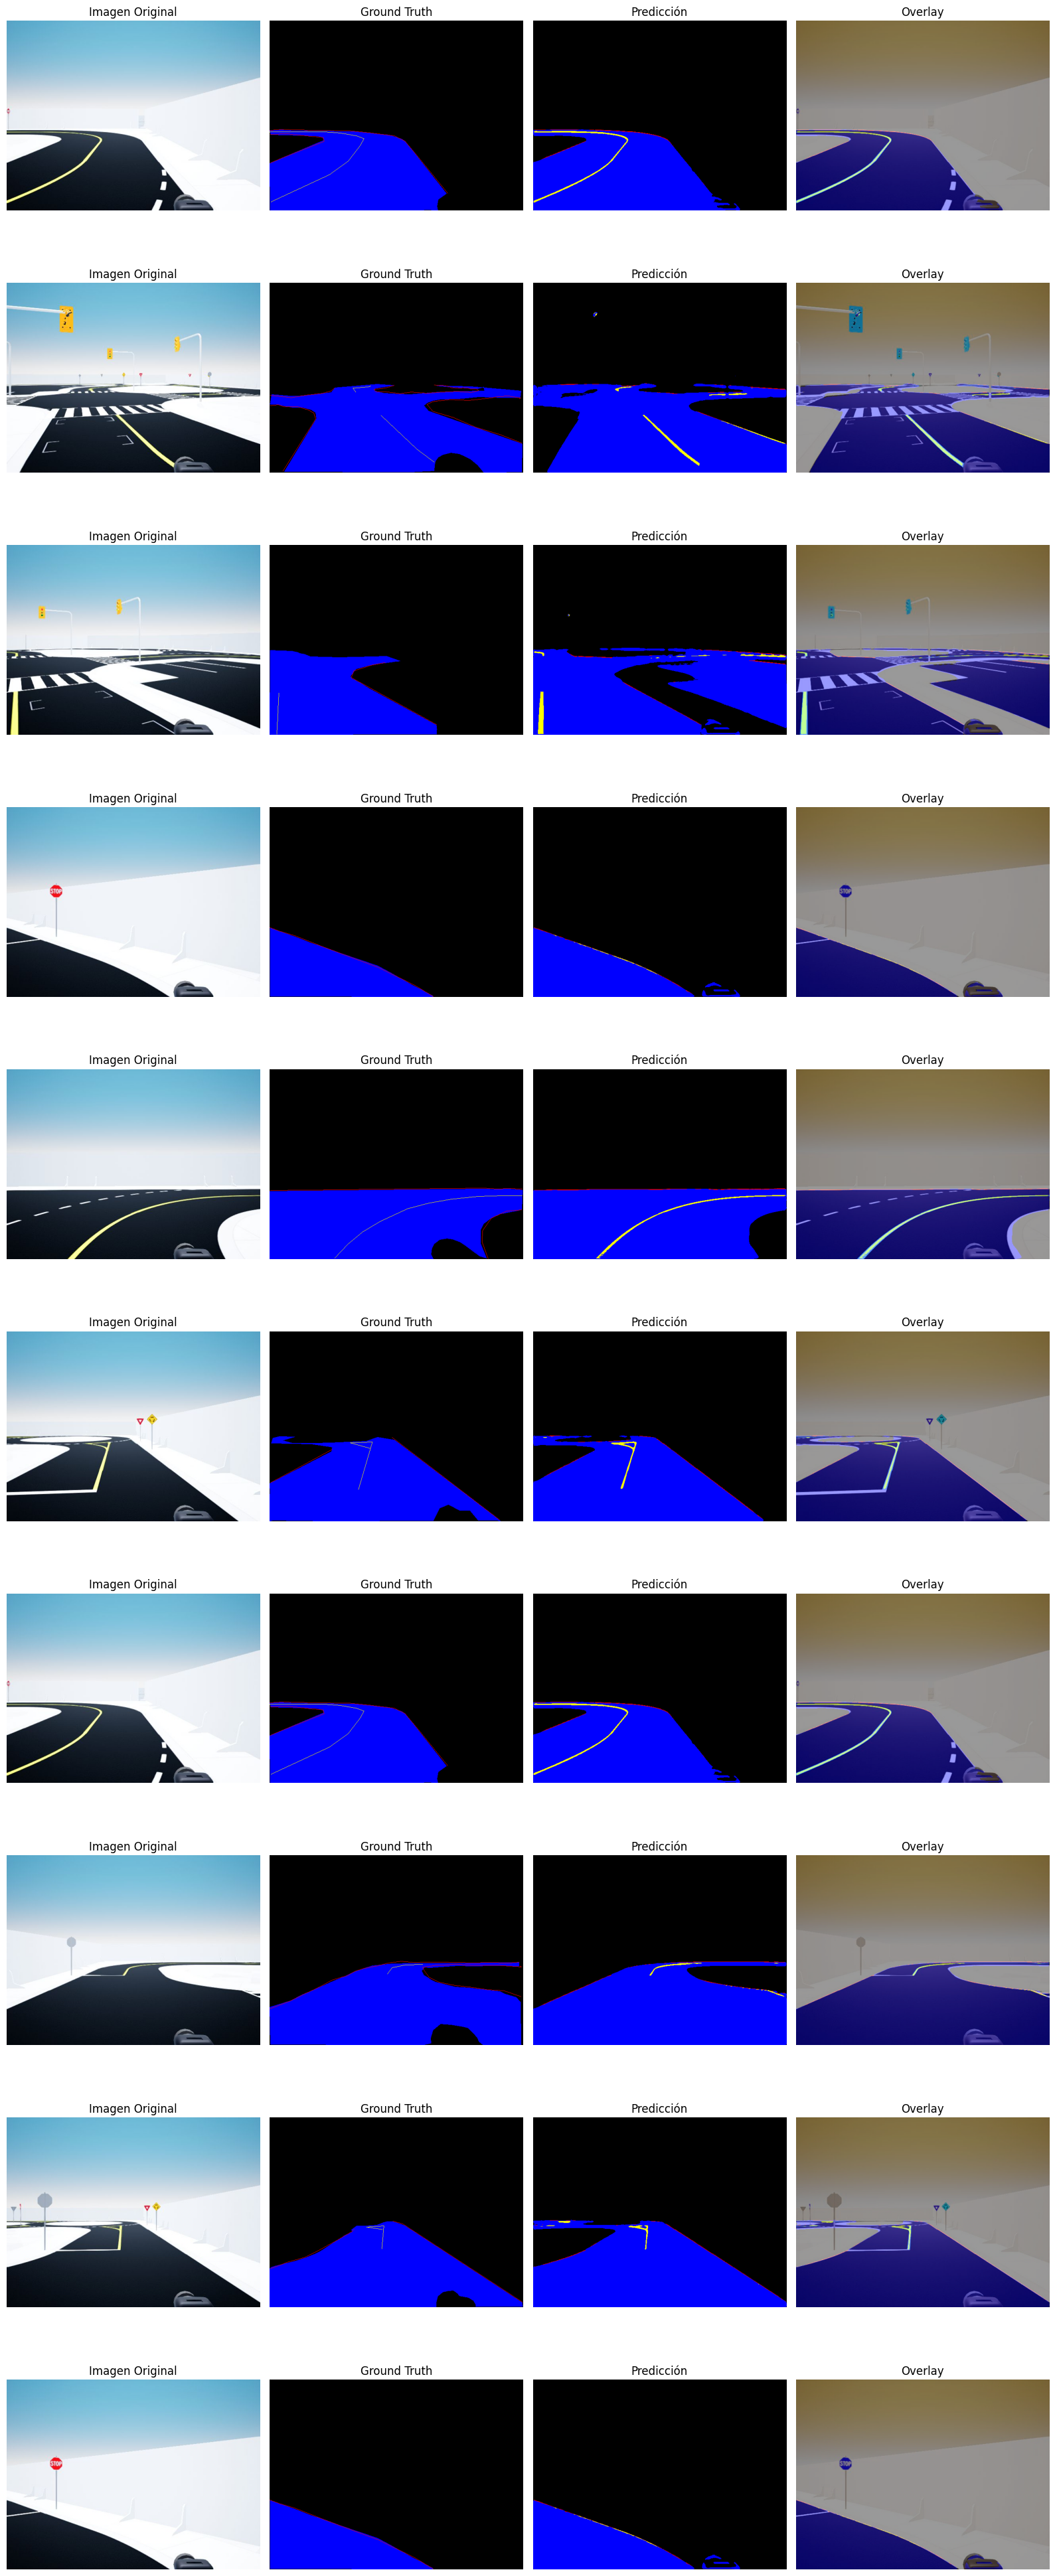

✅ Visualizaciones guardadas en: predictions_visualization.png


In [ ]:
# ============================================================================
# CELDA 7: VISUALIZACIÓN DE RESULTADOS
# ============================================================================

# Cargar mejor modelo
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# Colores para cada clase (BGR para OpenCV)
COLORS = {
    0: (0, 0, 0),       # Fondo/Vereda/Obstáculos - Negro
    1: (255, 0, 0),     # Camino/Asfalto - Azul
    2: (0, 255, 255),   # Líneas - Amarillo
    3: (0, 0, 255)      # Bordes - Rojo
}


def mask_to_color(mask, colors=COLORS):
    """Convierte máscara de clases a imagen RGB coloreada."""
    h, w = mask.shape
    color_mask = np.zeros((h, w, 3), dtype=np.uint8)
    
    for class_id, color in colors.items():
        color_mask[mask == class_id] = color
    
    return color_mask


def visualize_predictions(model, dataset, device, num_samples=4):
    """Visualiza predicciones del modelo vs ground truth."""
    model.eval()
    
    indices = np.random.choice(len(dataset), num_samples, replace=True)
    
    fig, axes = plt.subplots(num_samples, 4, figsize=(16, 4 * num_samples))
    
    with torch.no_grad():
        for i, idx in enumerate(indices):
            image, mask = dataset[idx]
            
            # Predicción
            image_tensor = image.unsqueeze(0).to(device)
            output = model(image_tensor)
            pred_mask = torch.argmax(output, dim=1).squeeze().cpu().numpy()
            
            # Convertir imagen para visualización
            image_np = image.permute(1, 2, 0).numpy()
            image_np = (image_np * 255).astype(np.uint8)
            
            # Máscaras coloreadas
            mask_np = mask.numpy()
            gt_colored = mask_to_color(mask_np)
            pred_colored = mask_to_color(pred_mask)
            
            # Overlay de predicción sobre imagen
            overlay = cv2.addWeighted(image_np, 0.6, pred_colored, 0.4, 0)
            
            # Mostrar
            axes[i, 0].imshow(image_np)
            axes[i, 0].set_title('Imagen Original')
            axes[i, 0].axis('off')
            
            axes[i, 1].imshow(cv2.cvtColor(gt_colored, cv2.COLOR_BGR2RGB))
            axes[i, 1].set_title('Ground Truth')
            axes[i, 1].axis('off')
            
            axes[i, 2].imshow(cv2.cvtColor(pred_colored, cv2.COLOR_BGR2RGB))
            axes[i, 2].set_title('Predicción')
            axes[i, 2].axis('off')
            
            axes[i, 3].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
            axes[i, 3].set_title('Overlay')
            axes[i, 3].axis('off')
    
    plt.tight_layout()
    plt.savefig('predictions_visualization.png', dpi=150)
    plt.show()
    
    print("✅ Visualizaciones guardadas en: predictions_visualization.png")


# Visualizar predicciones en conjunto de validación
print("\n🖼️ Generando visualizaciones...")
visualize_predictions(model, train_dataset, DEVICE, num_samples=10)


Example Path: qcar2_LaneSeg-ACC/train_unet/training_data/raw_images/
🔎 Se encontraron 792 imágenes. Seleccionando 10 al azar...

[1/10] Procesando: img_1768882823005.png


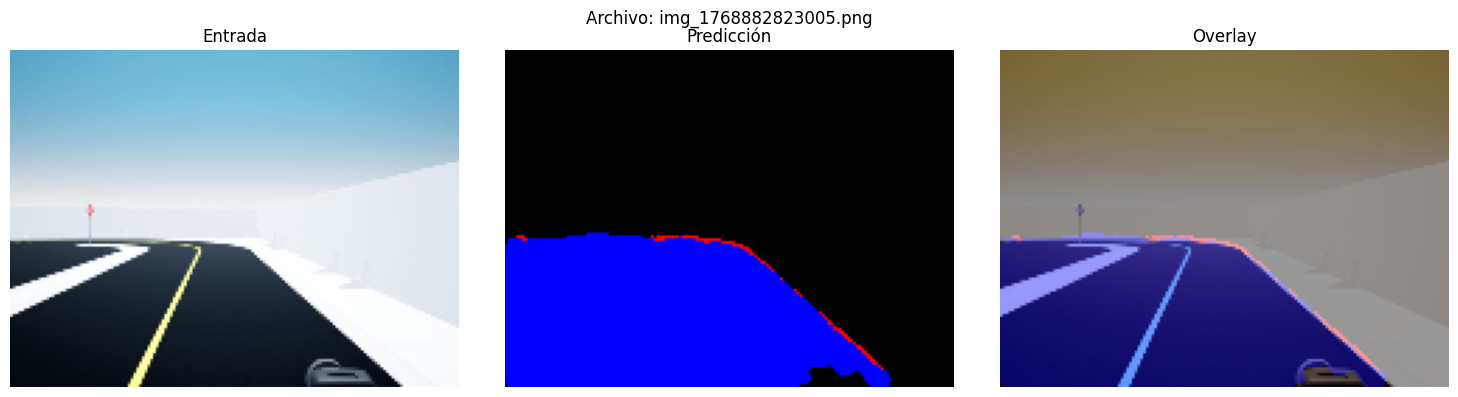

[2/10] Procesando: img_1769128765192.png


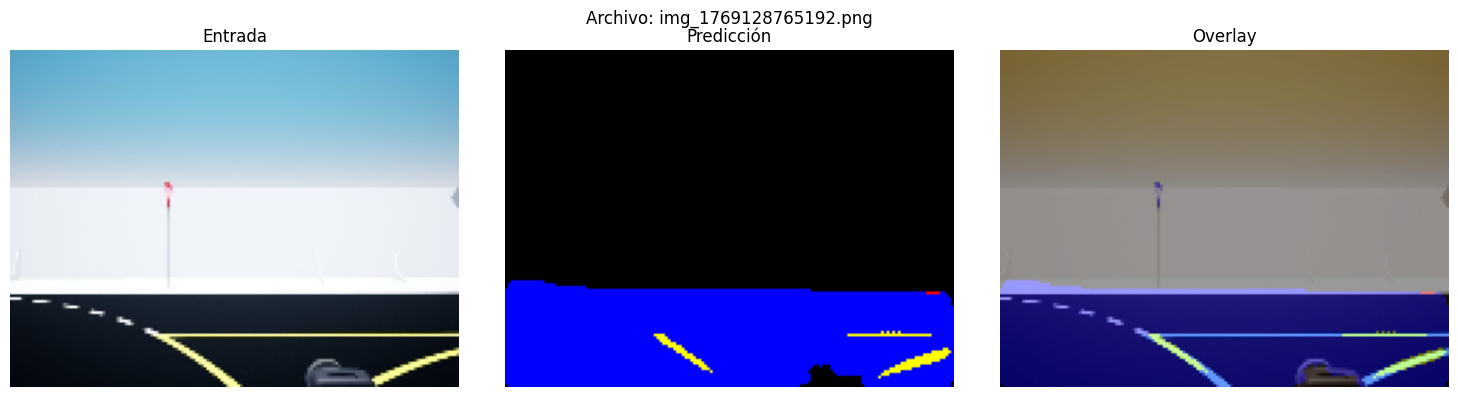

[3/10] Procesando: img_1768882855699.png


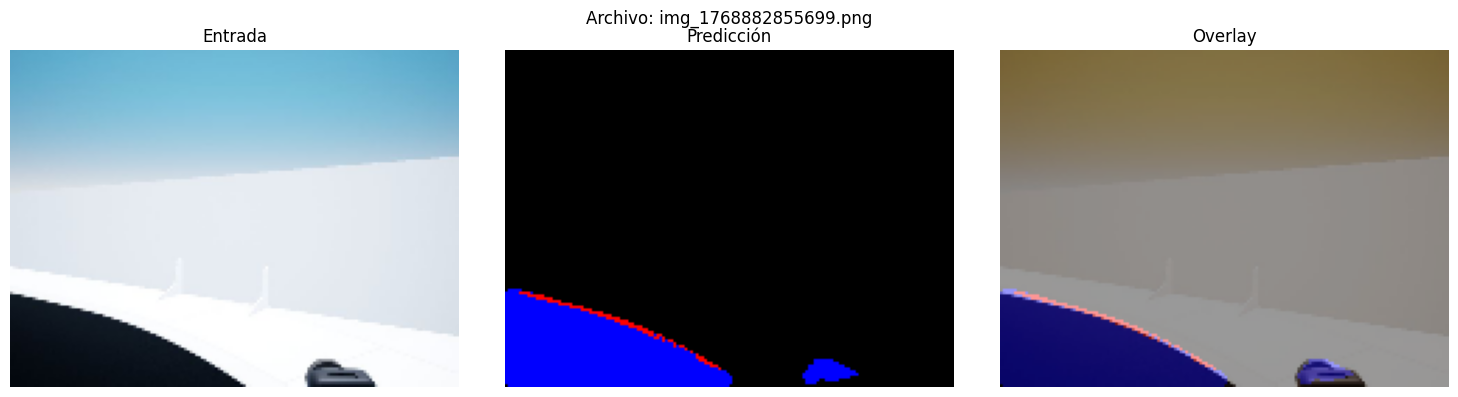

[4/10] Procesando: img_1769128897478.png


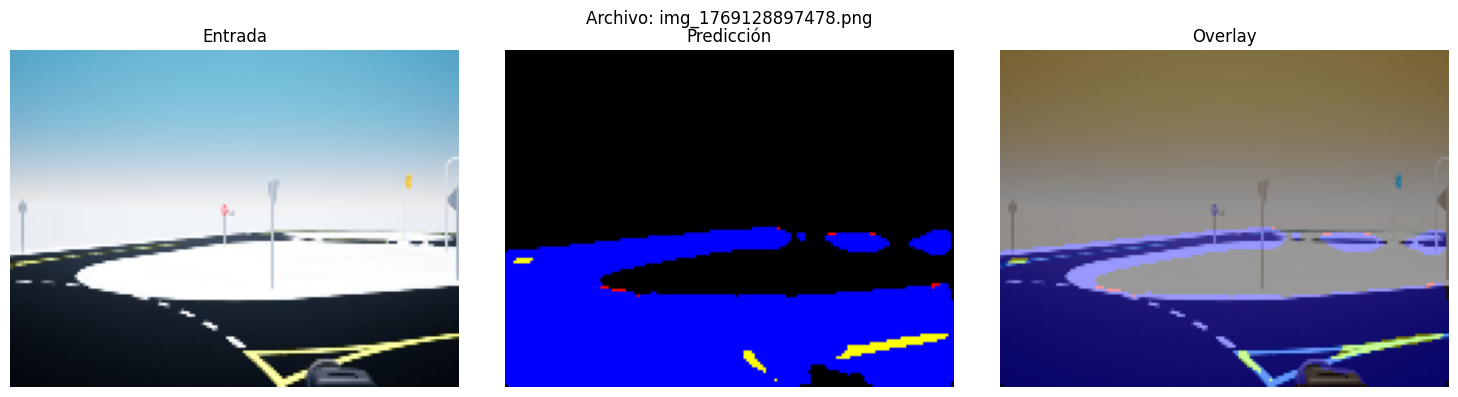

[5/10] Procesando: img_1769128730434.png


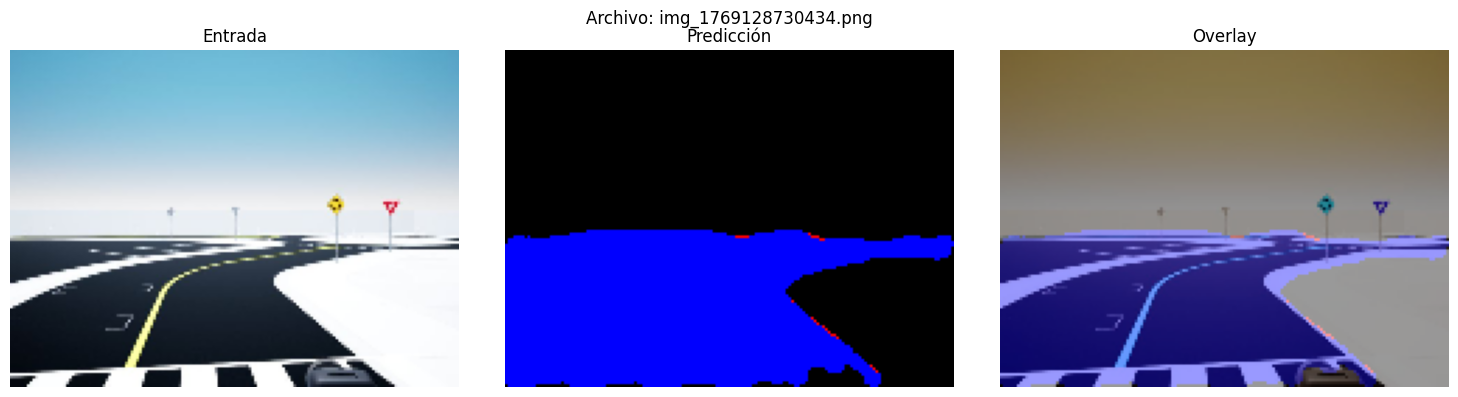

[6/10] Procesando: img_1768882991113.png


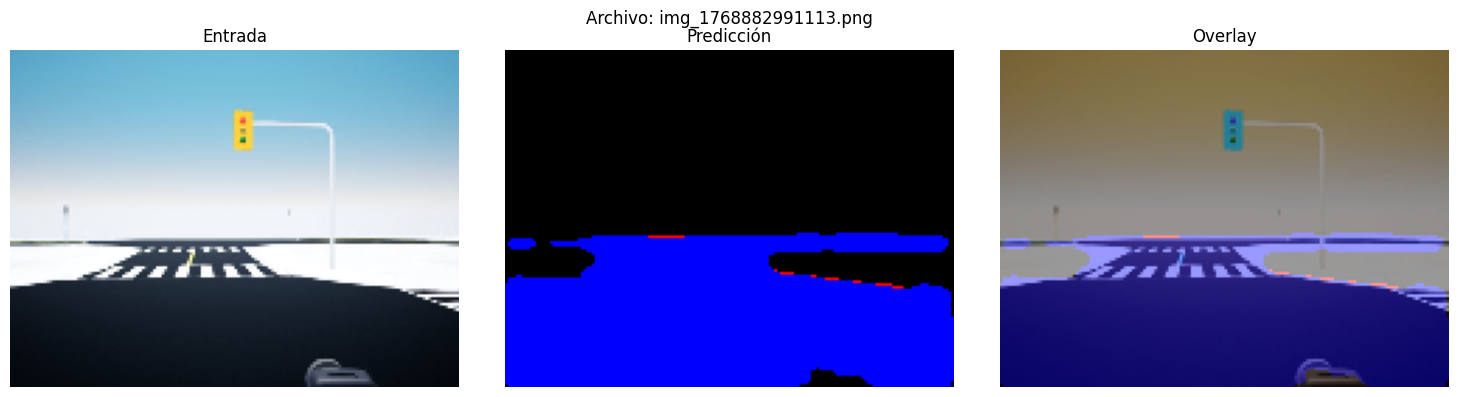

[7/10] Procesando: img_1769128843072.png


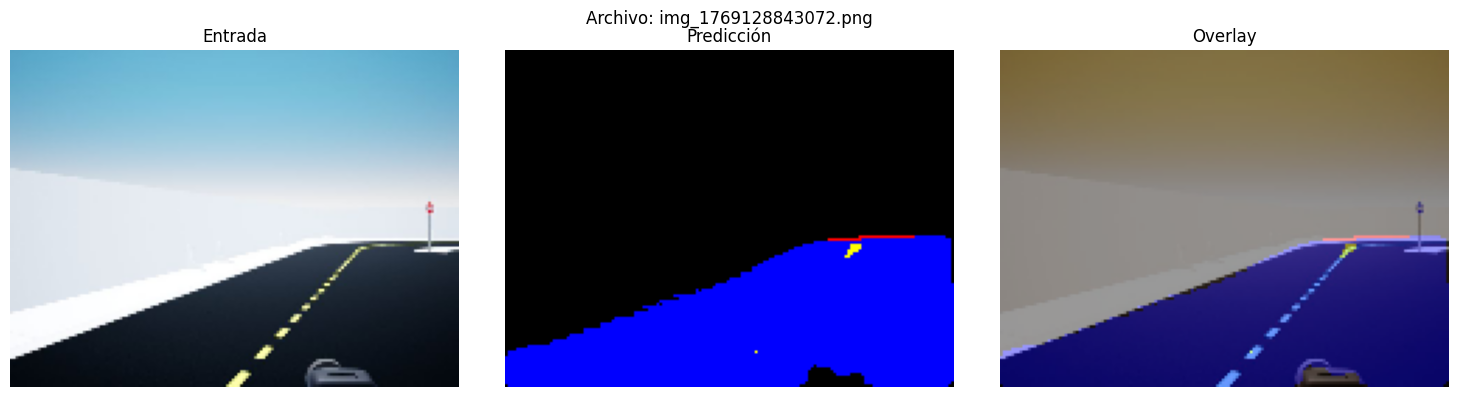

[8/10] Procesando: img_1769128970177.png


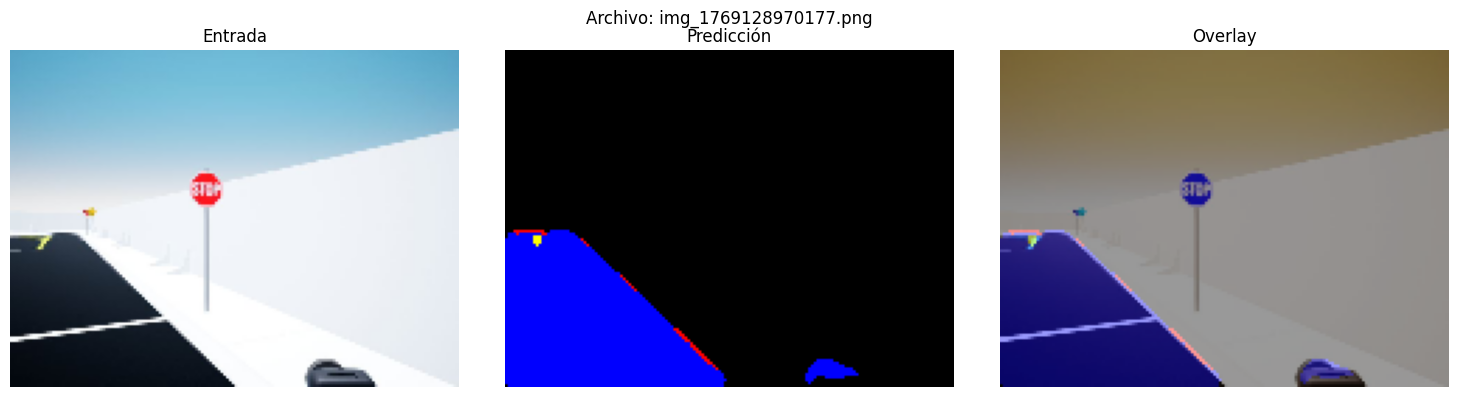

[9/10] Procesando: img_1769128952786.png


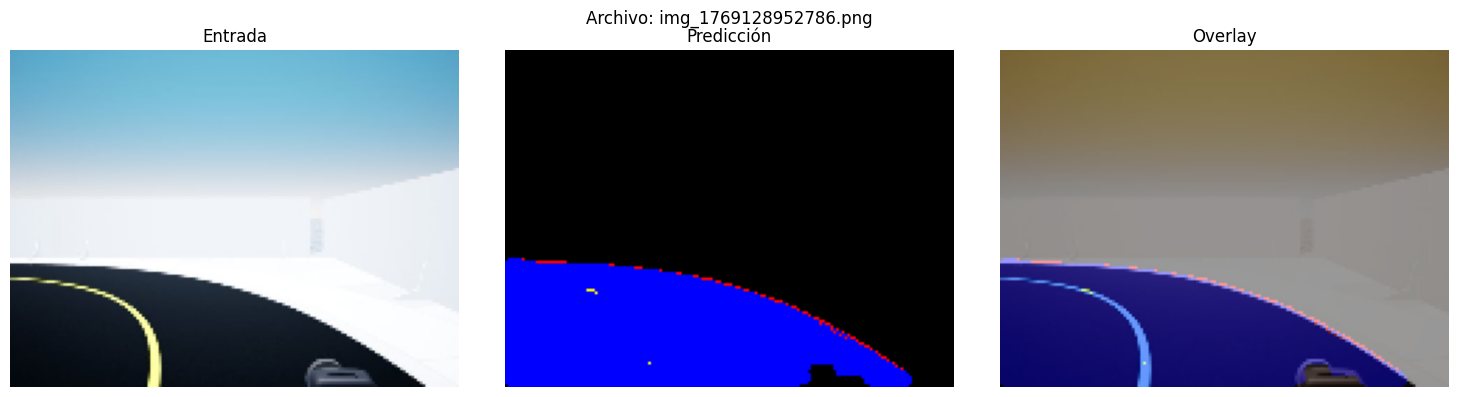

[10/10] Procesando: img_1769128833921.png


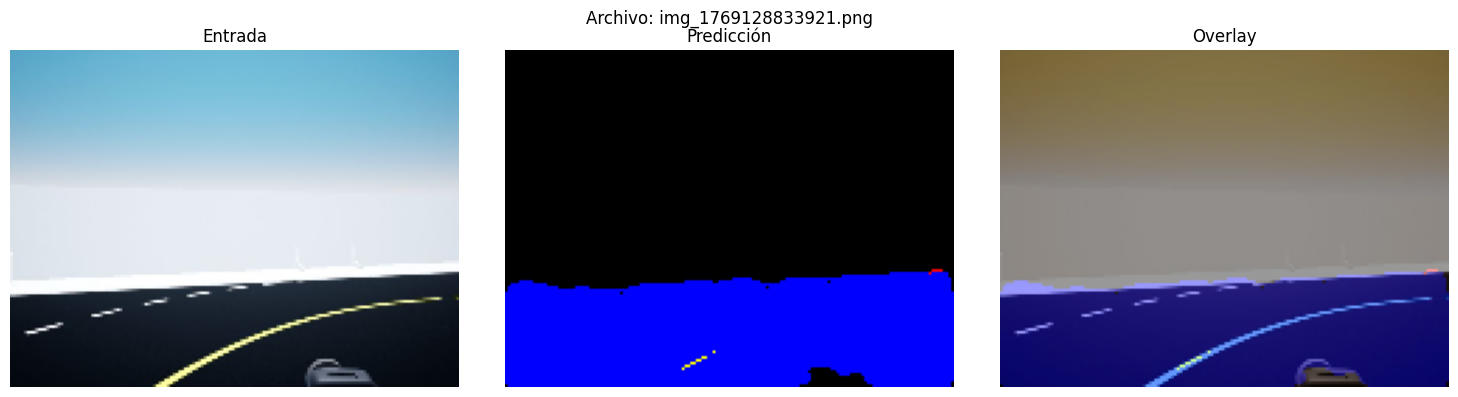

In [ ]:
# ============================================================================
# CELDA 8: INFERENCIA ALEATORIA EN LOTE (BATCH INFERENCE)
# ============================================================================
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

# ---------------- CONFIGURACIÓN ----------------
# 1. Ruta de la CARPETA donde están las imágenes (sin el nombre del archivo)
IMAGES_DIR = "qcar2_LaneSeg-ACC/train_unet/training_data/raw_images/"

# 2. ¿Cuántas imágenes al azar quieres probar?
NUM_SAMPLES = 10

# 3. Tamaño usado en el entrenamiento (Ancho, Alto)
TARGET_SIZE = (160, 120) 
# -----------------------------------------------

def predict_custom_image(image_path, model, device, target_size):
    """
    Carga una imagen, la procesa y muestra la segmentación.
    """
    if not os.path.exists(image_path):
        print(f"❌ Error: No se encontró: {image_path}")
        return

    # --- Preprocesamiento ---
    image_bgr = cv2.imread(image_path)
    if image_bgr is None:
        print(f"❌ Error al leer imagen (formato incorrecto?): {image_path}")
        return
        
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, target_size)
    
    # Normalizar y convertir a Tensor
    image_tensor = torch.from_numpy(image_resized).permute(2, 0, 1).float() / 255.0
    image_tensor = image_tensor.unsqueeze(0).to(device)

    # --- Inferencia ---
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        pred_mask = torch.argmax(output, dim=1).squeeze().cpu().numpy()

    # --- Visualización ---
    image_display = image_resized.astype(np.uint8)
    
    # Nota: Asegúrate de haber ejecutado la celda donde defines mask_to_color y COLORS
    try:
        pred_colored = mask_to_color(pred_mask) 
    except NameError:
        print("⚠️ Error: La función 'mask_to_color' no está definida. Ejecuta la celda anterior.")
        return

    overlay = cv2.addWeighted(image_display, 0.6, pred_colored, 0.4, 0)

    # Graficar
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle(f"Archivo: {os.path.basename(image_path)}", fontsize=12)
    
    axes[0].imshow(image_display)
    axes[0].set_title('Entrada')
    axes[0].axis('off')
    
    axes[1].imshow(cv2.cvtColor(pred_colored, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Predicción')
    axes[1].axis('off')
    
    axes[2].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Overlay')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

# --- LÓGICA DE SELECCIÓN ALEATORIA ---
def run_random_batch_inference():
    if not os.path.exists(IMAGES_DIR):
        print(f"❌ La carpeta no existe: {IMAGES_DIR}")
        return

    # 1. Listar archivos de imagen válidos
    valid_extensions = ('.png', '.jpg', '.jpeg', '.bmp')
    all_files = [f for f in os.listdir(IMAGES_DIR) if f.lower().endswith(valid_extensions)]
    
    total_images = len(all_files)
    if total_images == 0:
        print(f"⚠️ No se encontraron imágenes en: {IMAGES_DIR}")
        return

    # 2. Seleccionar muestras
    # Si hay menos imágenes que las pedidas, usamos todas las disponibles
    n_to_select = min(NUM_SAMPLES, total_images)
    selected_files = random.sample(all_files, n_to_select)

    print(f"Example Path: {IMAGES_DIR}")
    print(f"🔎 Se encontraron {total_images} imágenes. Seleccionando {n_to_select} al azar...\n")

    # 3. Iterar e inferir
    for i, filename in enumerate(selected_files):
        full_path = os.path.join(IMAGES_DIR, filename)
        print(f"[{i+1}/{n_to_select}] Procesando: {filename}")
        predict_custom_image(full_path, model, DEVICE, TARGET_SIZE)

# Ejecutar
run_random_batch_inference()

In [ ]:
# ============================================================================
# CELDA 9: EXPORTACIÓN A ONNX
# ============================================================================

print("\n📦 Exportando modelo a formato ONNX...")

# Cargar mejor modelo
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
model.to(DEVICE)

# Crear tensor de entrada dummy (batch_size=1, canales=3, H=480, W=640)
dummy_input = torch.randn(1, 3, IMAGE_HEIGHT, IMAGE_WIDTH).to(DEVICE)

# Nombre del archivo ONNX
onnx_path = 'lane_unet.onnx'

# Exportar a ONNX
torch.onnx.export(
    model,                          # Modelo a exportar
    dummy_input,                    # Entrada de ejemplo
    onnx_path,                      # Ruta de salida
    export_params=True,             # Exportar parámetros entrenados
    opset_version=11,               # Versión ONNX (compatible con Isaac ROS)
    do_constant_folding=True,       # Optimización
    input_names=['input_tensor'],   # Nombre del tensor de entrada
    output_names=['output_tensor'], # Nombre del tensor de salida
    dynamic_axes={                  # Ejes dinámicos (batch size variable)
        'input_tensor': {0: 'batch_size'},
        'output_tensor': {0: 'batch_size'}
    }
)

print(f"✅ Modelo exportado exitosamente a: {onnx_path}")
print(f"\nEspecificaciones del modelo ONNX:")
print(f"   - Input shape: (batch_size, 3, {IMAGE_HEIGHT}, {IMAGE_WIDTH})")
print(f"   - Output shape: (batch_size, {NUM_CLASSES}, {IMAGE_HEIGHT}, {IMAGE_WIDTH})")
print(f"   - Input name: 'input_tensor'")
print(f"   - Output name: 'output_tensor'")
print(f"   - Opset version: 11")
print(f"\n🎯 Listo para Isaac ROS!")


# Verificar archivo ONNX (opcional, requiere onnx library)
try:
    import onnx
    
    onnx_model = onnx.load(onnx_path)
    onnx.checker.check_model(onnx_model)
    
    print("\n✅ Verificación ONNX exitosa:")
    print(f"   - Archivo válido")
    print(f"   - Tamaño: {os.path.getsize(onnx_path) / (1024*1024):.2f} MB")
    
except ImportError:
    print("\n⚠️ onnx library no instalada, saltando verificación")
    print("   Para verificar: pip install onnx")


print("\n" + "="*70)
print("✨ PROCESO COMPLETADO ✨")
print("="*70)
print("\nArchivos generados:")
print("  ✓ best_model.pth - Modelo PyTorch entrenado")
print("  ✓ lane_unet.onnx - Modelo ONNX para Isaac ROS")
print("  ✓ training_curves.png - Curvas de entrenamiento")
print("  ✓ predictions_visualization.png - Visualizaciones de predicciones")
print("\nPróximos pasos:")
print("  1. Validar modelo ONNX con TensorRT")
print("  2. Integrar con Isaac ROS")
print("  3. Probar en QCar2")



📦 Exportando modelo a formato ONNX...
✅ Modelo exportado exitosamente a: lane_unet.onnx

Especificaciones del modelo ONNX:
   - Input shape: (batch_size, 3, 480, 640)
   - Output shape: (batch_size, 4, 480, 640)
   - Input name: 'input_tensor'
   - Output name: 'output_tensor'
   - Opset version: 11

🎯 Listo para Isaac ROS!

✅ Verificación ONNX exitosa:
   - Archivo válido
   - Tamaño: 50.74 MB

✨ PROCESO COMPLETADO ✨

Archivos generados:
  ✓ best_model.pth - Modelo PyTorch entrenado
  ✓ lane_unet.onnx - Modelo ONNX para Isaac ROS
  ✓ training_curves.png - Curvas de entrenamiento
  ✓ predictions_visualization.png - Visualizaciones de predicciones

Próximos pasos:
  1. Validar modelo ONNX con TensorRT
  2. Integrar con Isaac ROS
  3. Probar en QCar2
